In [1]:
import pandas as pd
import numpy as np
from scipy import stats
pd.options.display.float_format = '{:.3f}'.format
pd.options.display.max_columns = None
pd.set_option('display.max_colwidth', None)
from typing import List, Dict

#Librerias de Visualización
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib.table import Table

from scipy.stats import skew, norm

#Reusable packages
import sys
import os
sys.path.append(os.path.abspath('../Scripts'))
from Functions.eda import *

In [2]:
df = pd.read_csv('../data/raw_data/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.000,730.500,421.610,1.000,365.750,730.500,1095.250,1460.000
MSSubClass,1460.000,56.897,42.301,20.000,20.000,50.000,70.000,190.000
LotFrontage,1201.000,70.050,24.285,21.000,59.000,69.000,80.000,313.000
LotArea,1460.000,10516.828,9981.265,1300.000,7553.500,9478.500,11601.500,215245.000
OverallQual,1460.000,6.099,1.383,1.000,5.000,6.000,7.000,10.000
OverallCond,1460.000,5.575,1.113,1.000,5.000,5.000,6.000,9.000
YearBuilt,1460.000,1971.268,30.203,1872.000,1954.000,1973.000,2000.000,2010.000
YearRemodAdd,1460.000,1984.866,20.645,1950.000,1967.000,1994.000,2004.000,2010.000
MasVnrArea,1452.000,103.685,181.066,0.000,0.000,0.000,166.000,1600.000
BsmtFinSF1,1460.000,443.640,456.098,0.000,0.000,383.500,712.250,5644.000


# Missing Values

In [4]:
missing_dict = {}
for col in df.columns:
    if df[col].isnull().any():
        missing_dict[col] = df[col].isnull().sum()

for i, (var, count) in enumerate(missing_dict.items()):
    print(f'{i + 1}: {var} has missing: {count}')


1: LotFrontage has missing: 259
2: Alley has missing: 1369
3: MasVnrType has missing: 872
4: MasVnrArea has missing: 8
5: BsmtQual has missing: 37
6: BsmtCond has missing: 37
7: BsmtExposure has missing: 38
8: BsmtFinType1 has missing: 37
9: BsmtFinType2 has missing: 38
10: Electrical has missing: 1
11: FireplaceQu has missing: 690
12: GarageType has missing: 81
13: GarageYrBlt has missing: 81
14: GarageFinish has missing: 81
15: GarageQual has missing: 81
16: GarageCond has missing: 81
17: PoolQC has missing: 1453
18: Fence has missing: 1179
19: MiscFeature has missing: 1406


# Are missing values correlated?
Is there any pattern in the missing values of this dataset? lets check this theory using a heatmap for nulls. Also since we are working with a decent number of variables lets separate into differents subsets for a more granular analysis.

<Axes: >

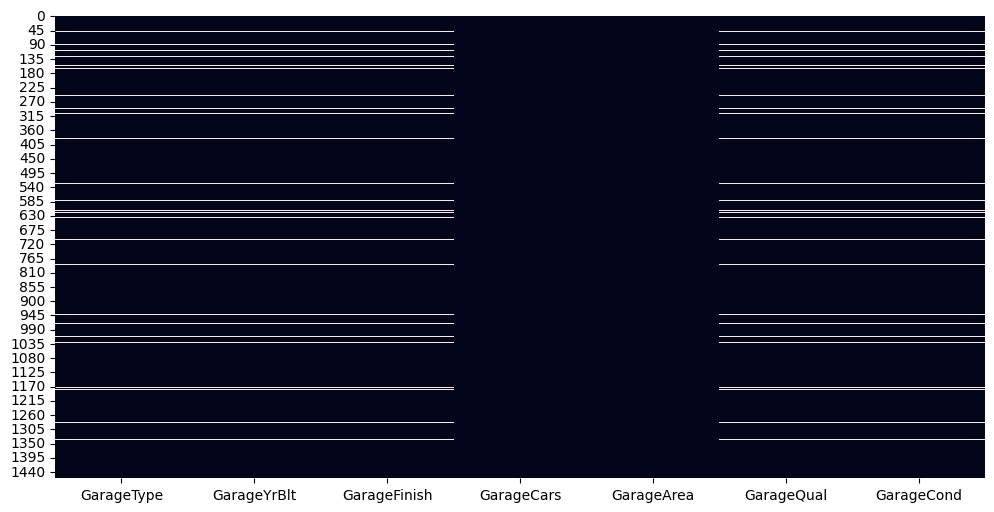

In [5]:
garage_vars = [
    'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 
    'GarageArea', 'GarageQual', 'GarageCond'
]

basement_vars = [
    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
    'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF'
]

exterior_vars = [
    'LotFrontage', 'LotArea', 'LotShape', 'LandContour', 'RoofStyle', 
    'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Fence',
    'PavedDrive', 'Street', 'Alley'
]

structure_vars = [
    'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 
    'YearBuilt', 'YearRemodAdd', 'Foundation'
]

heating_cooling_vars = [
    'Heating', 'HeatingQC', 'CentralAir', 'Electrical'
]

interior_vars = [
    '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 
    'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Fireplaces', 'FireplaceQu'
]

bathroom_vars = [
    'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'
]


plt.figure(figsize=(12,6))
sns.heatmap(df[garage_vars].isnull(), cbar = False)

#plt.figure(figsize=(12,6))
#sns.heatmap(df[basement_vars].isnull(), cbar = False)

Here we can see that this missing values where features that werent present on the house but then why would they fill with zeros GarageCars and GarageArea, might be because of the nature type of the variables (numeric). The same pattern can be seen on basement variables. Structure_vars, heating_cooling_vars, interior_vars and bathroom_vars doesnt have any correlation on their missing.

<Axes: >

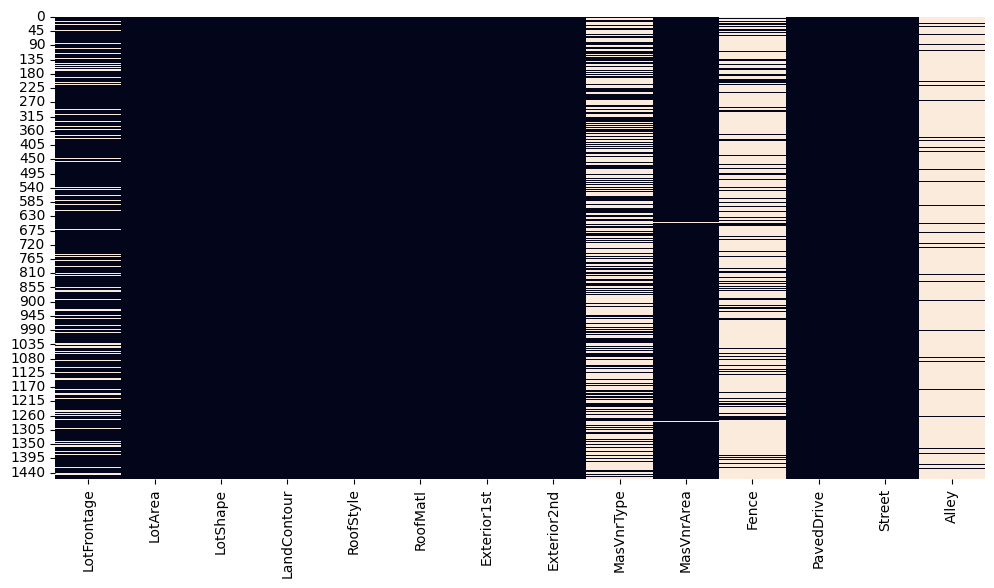

In [6]:
plt.figure(figsize=(12,6))
sns.heatmap(df[exterior_vars].isnull(), cbar = False)

LotFrontage, a numeric variable, contains missing values and was initially thought to be correlated with Alley based on logical assumptions. The hypothesis was that if a house was located on an Alley (Grvl or Pave), it would have a LotFrontage value. However, the analysis shows no such correlation.

In [7]:
df['Alley'] = df['Alley'].fillna('NA')
missing_lotfrontage = df.groupby("Alley")["LotFrontage"].apply(lambda x: x.isnull().sum())
total_counts = df["Alley"].value_counts()

# Combinar los datos en una tabla
summary = pd.DataFrame({"Total Houses": total_counts, "Doesnt have LotFrontage": missing_lotfrontage})
summary["% Doesnt have LotFrontage"] = (summary["Doesnt have LotFrontage"] / summary["Total Houses"]) * 100
print(summary)

       Total Houses  Doesnt have LotFrontage  % Doesnt have LotFrontage
Alley                                                                  
Grvl             50                        3                      6.000
NA             1369                      254                     18.554
Pave             41                        2                      4.878


# Duplicated Values

In [8]:
df.duplicated().sum().sum()

0

# Distribution and Outliers

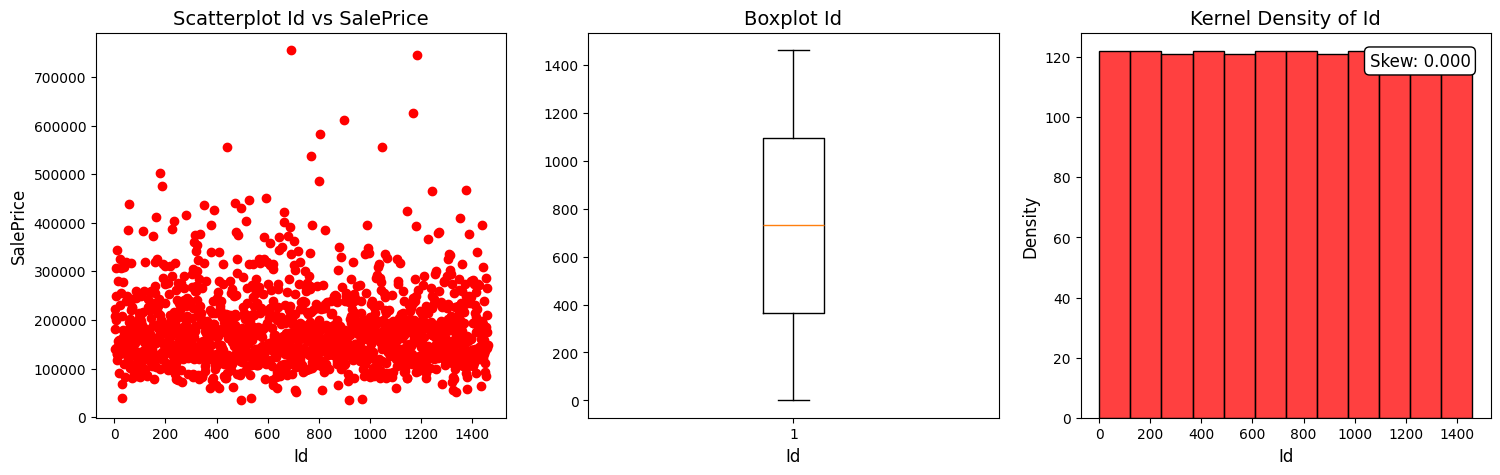

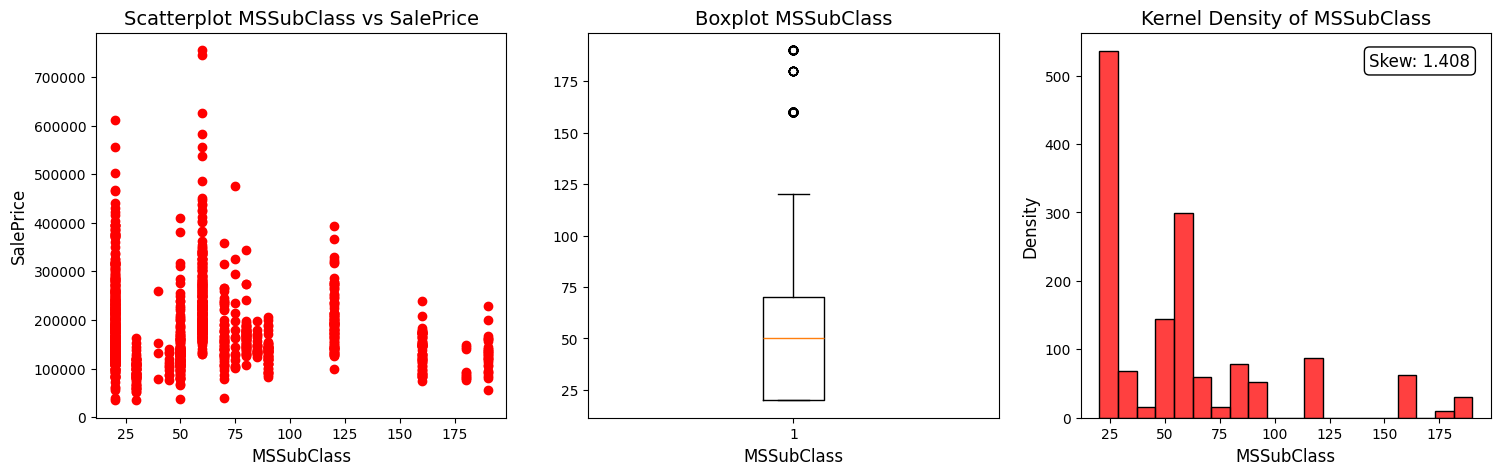

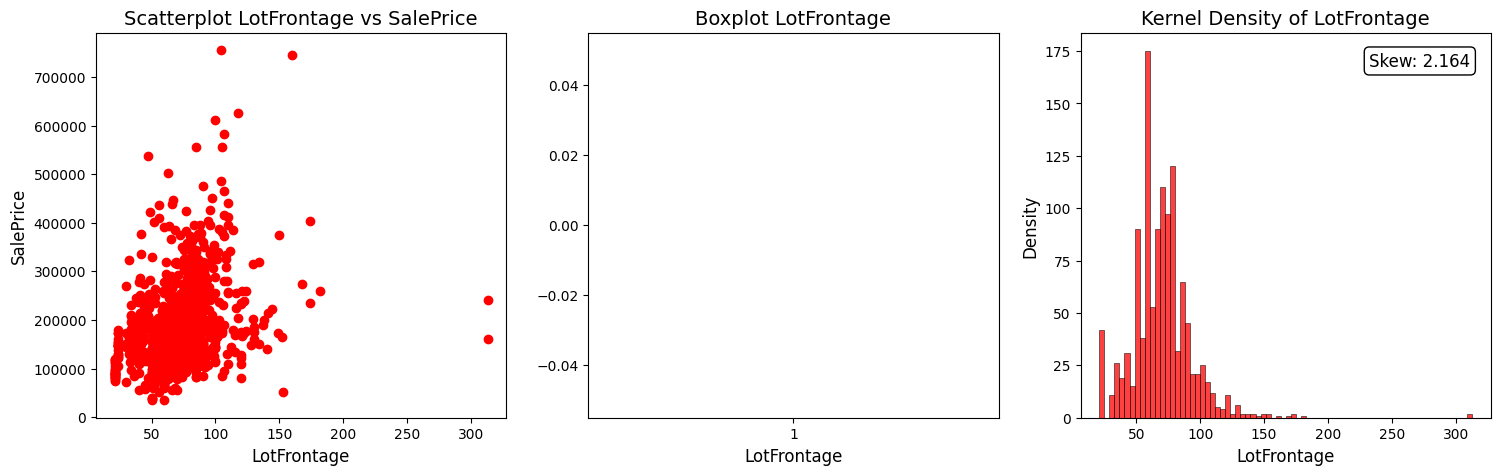

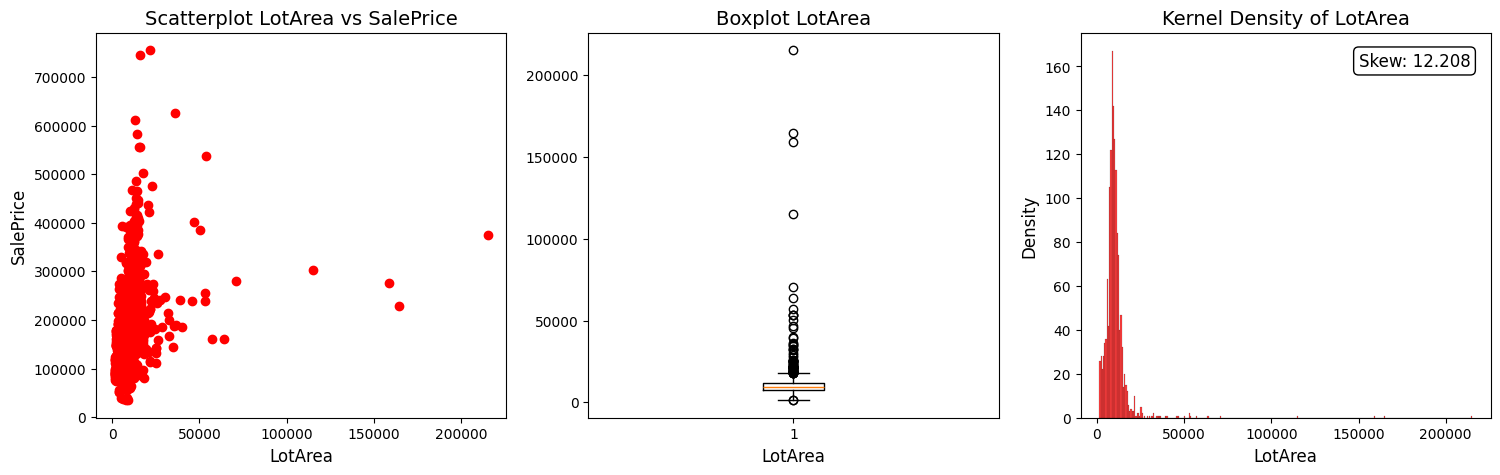

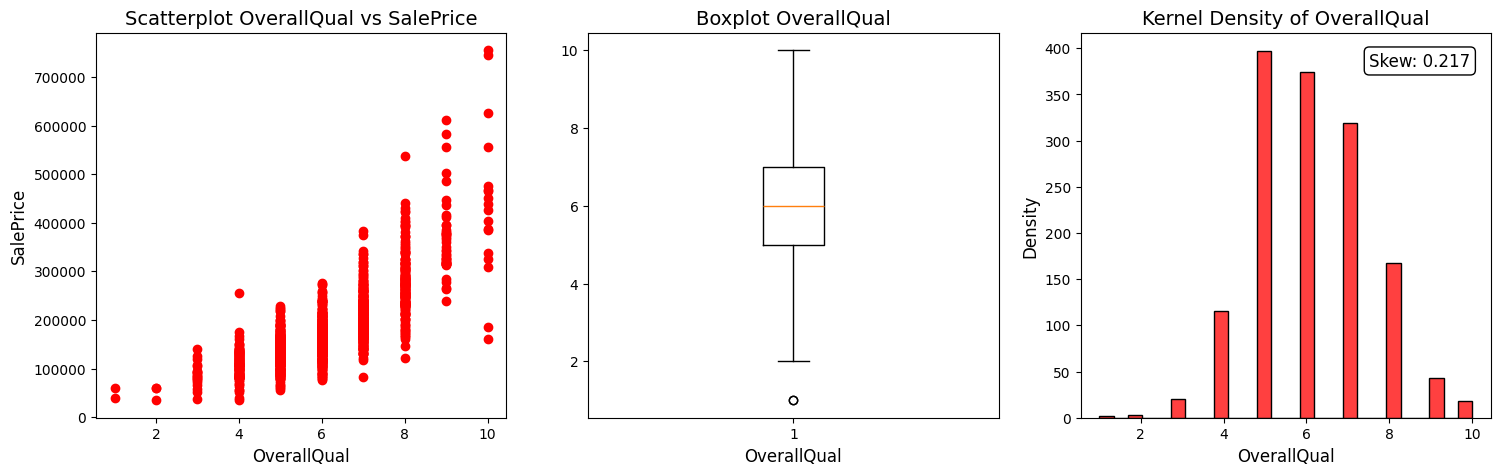

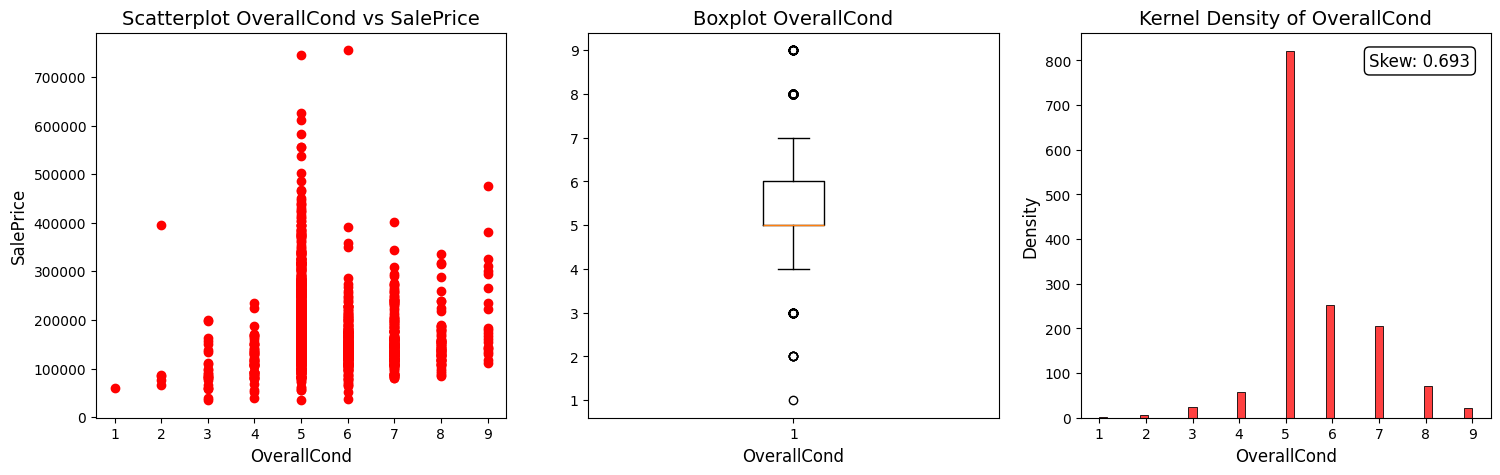

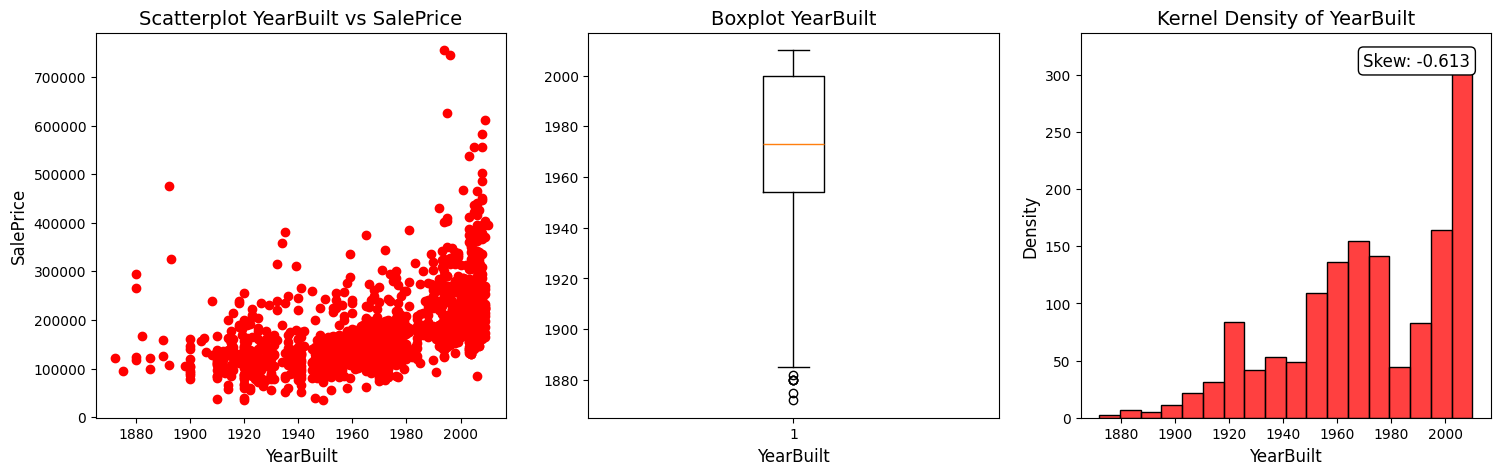

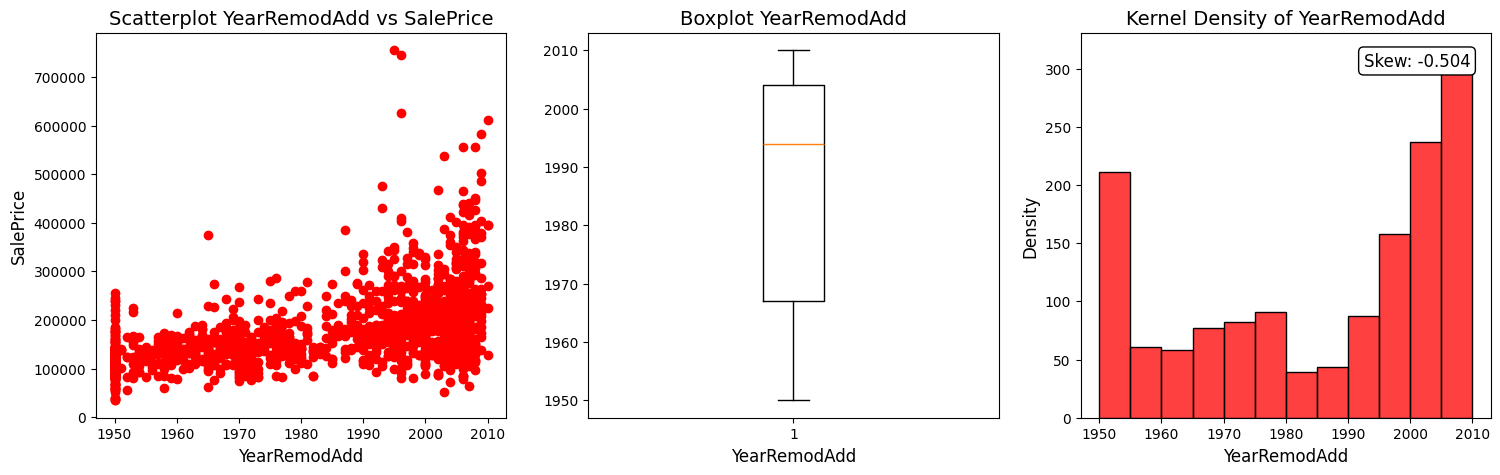

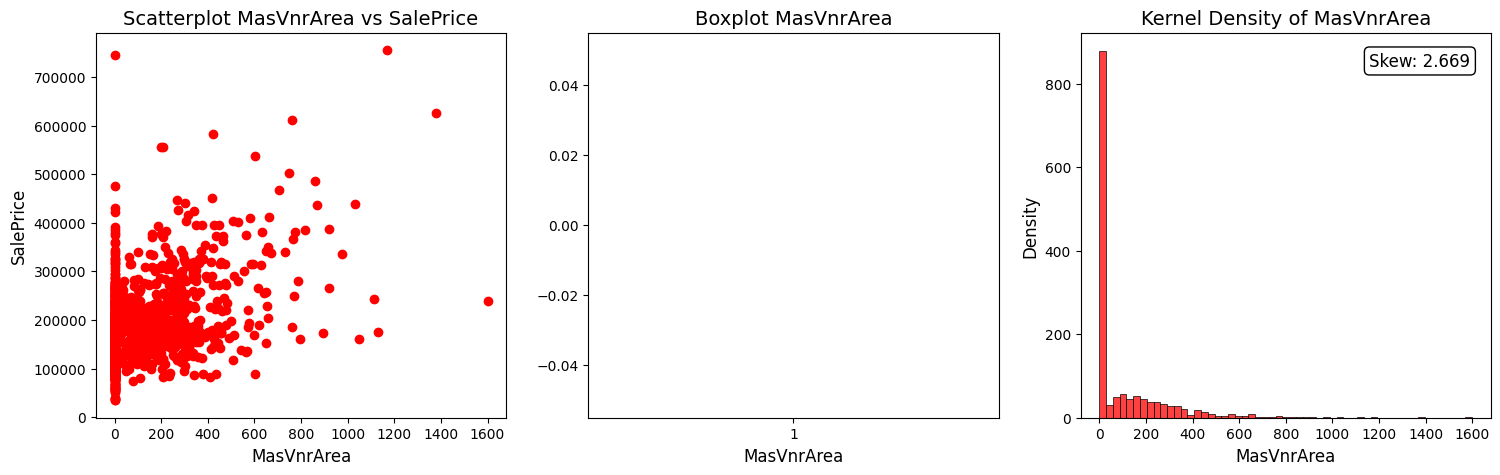

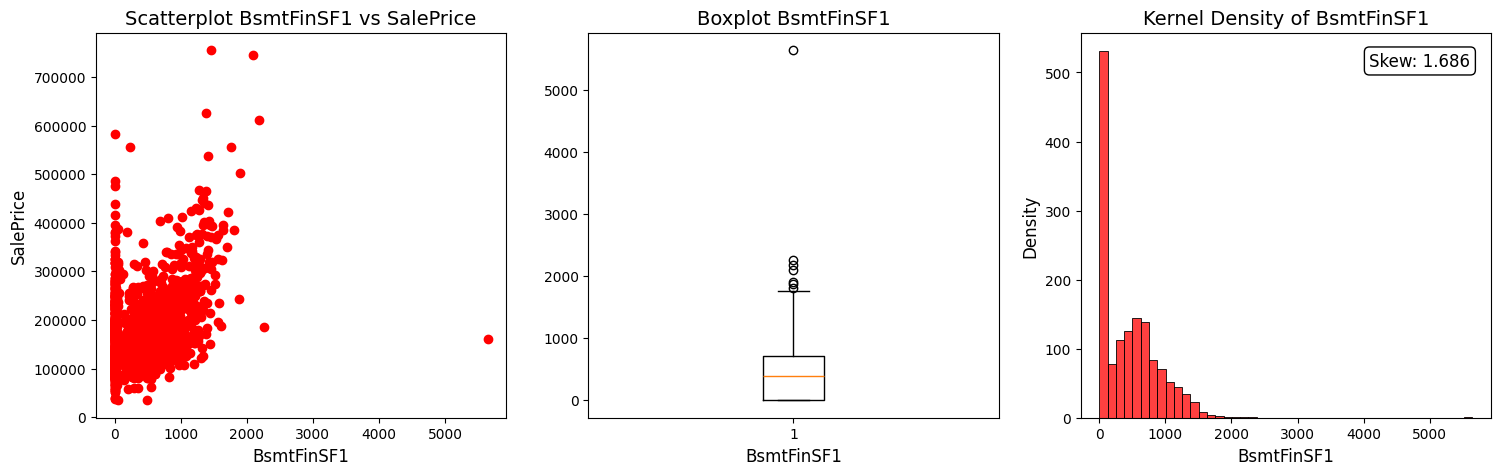

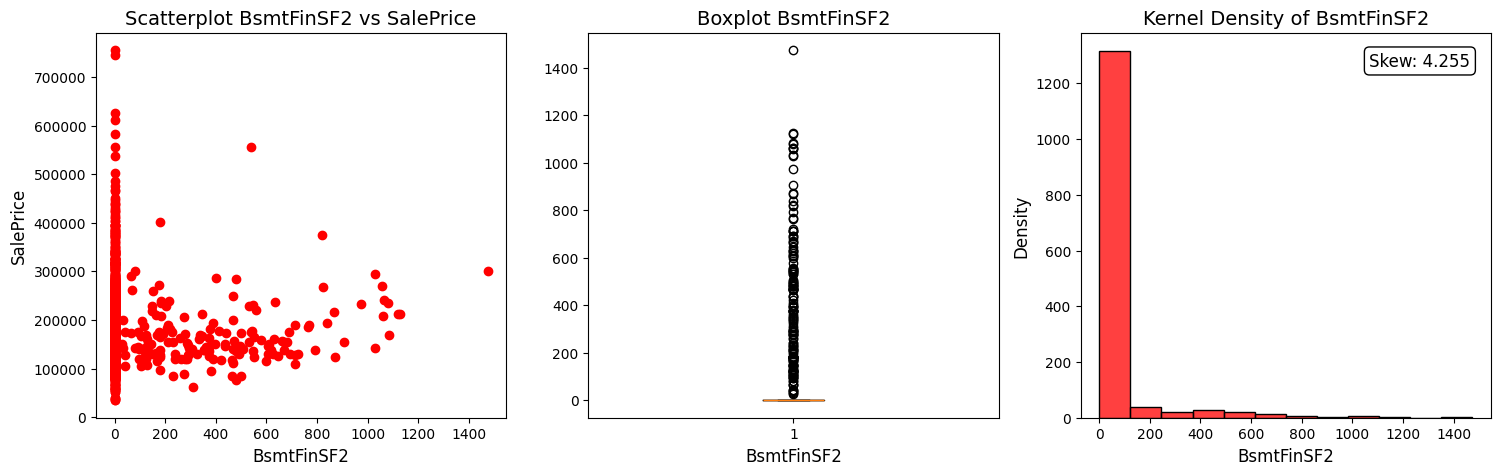

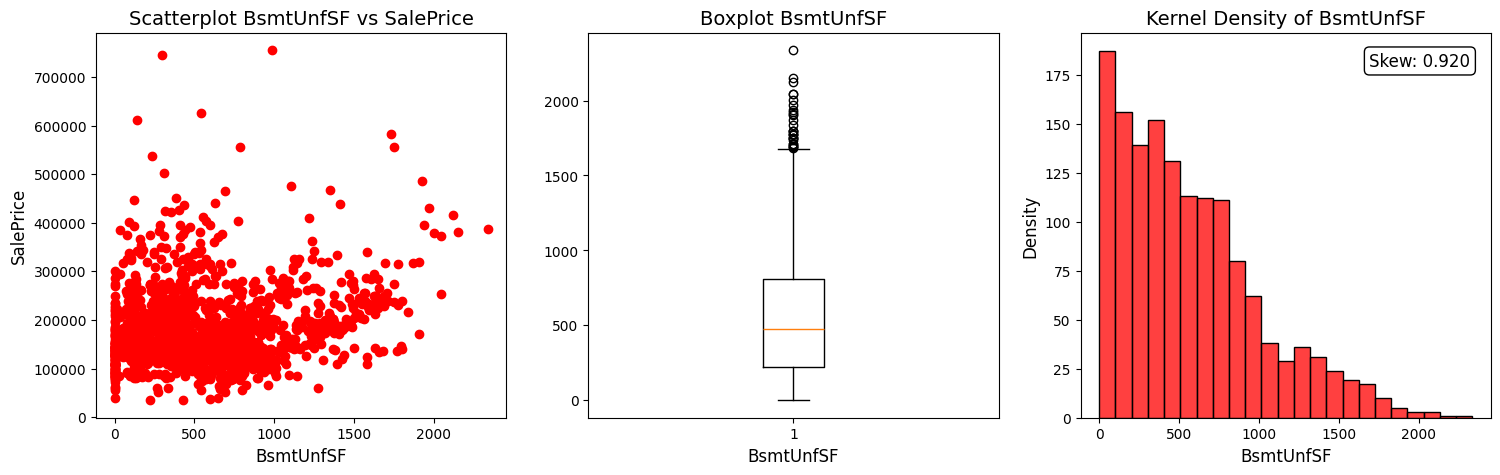

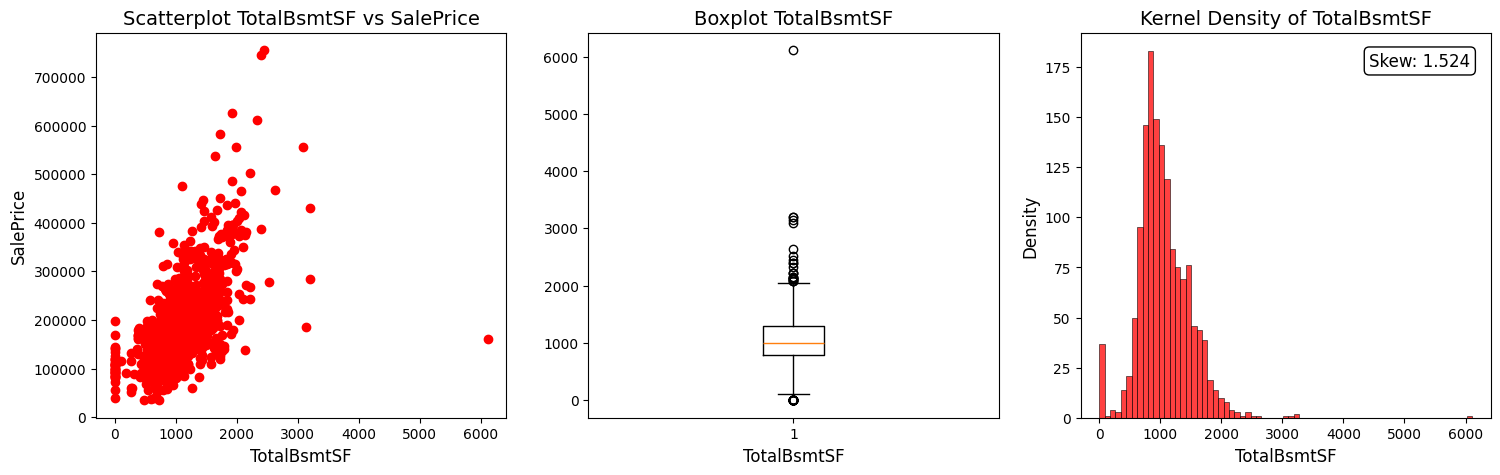

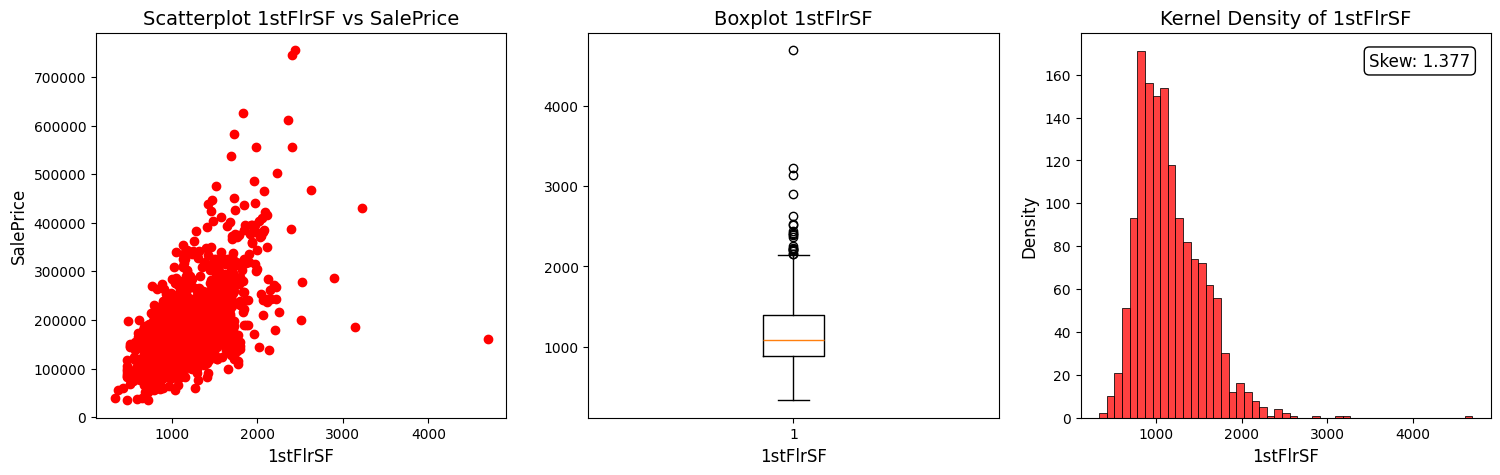

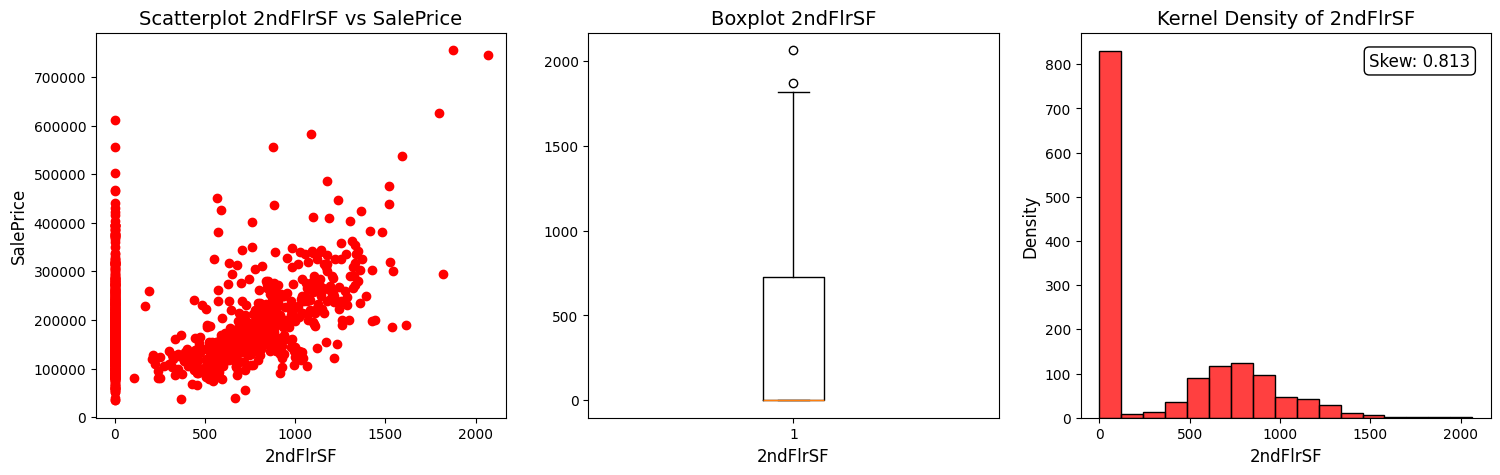

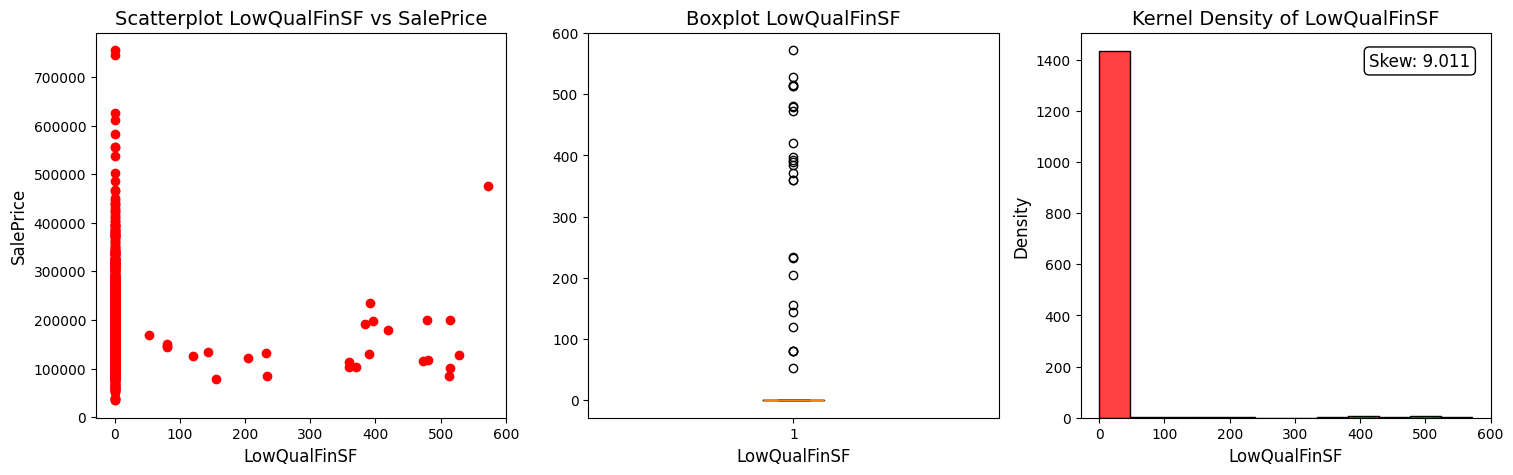

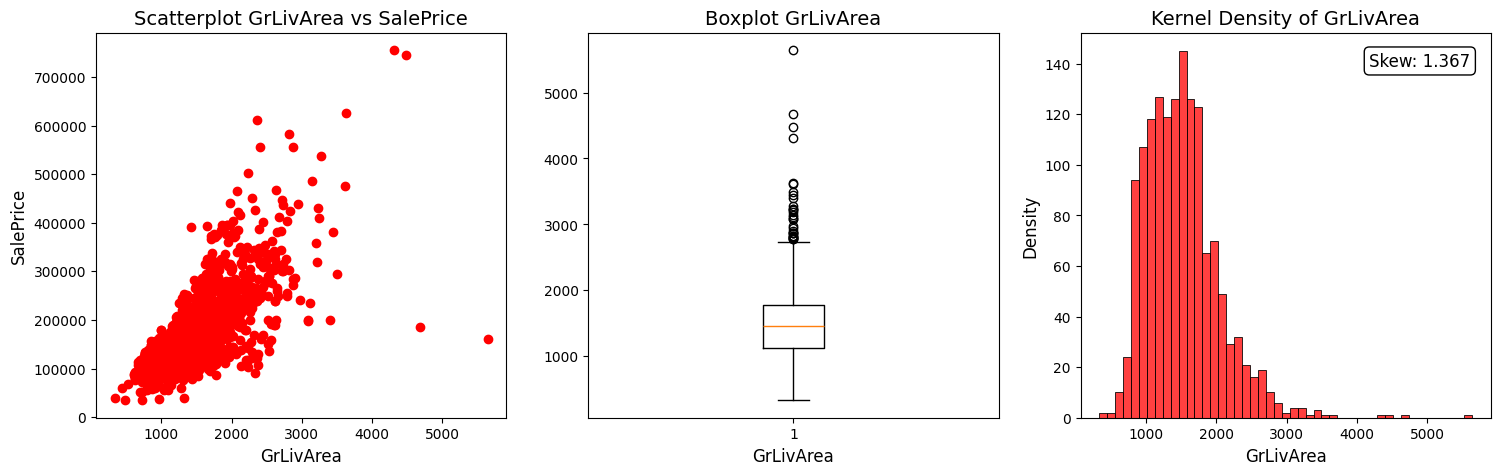

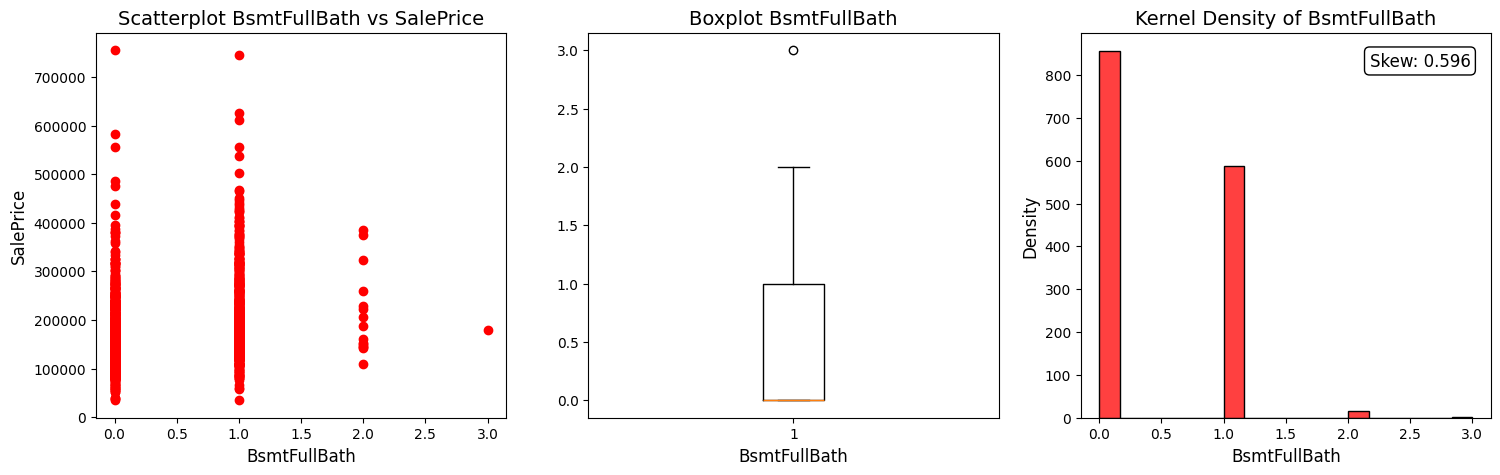

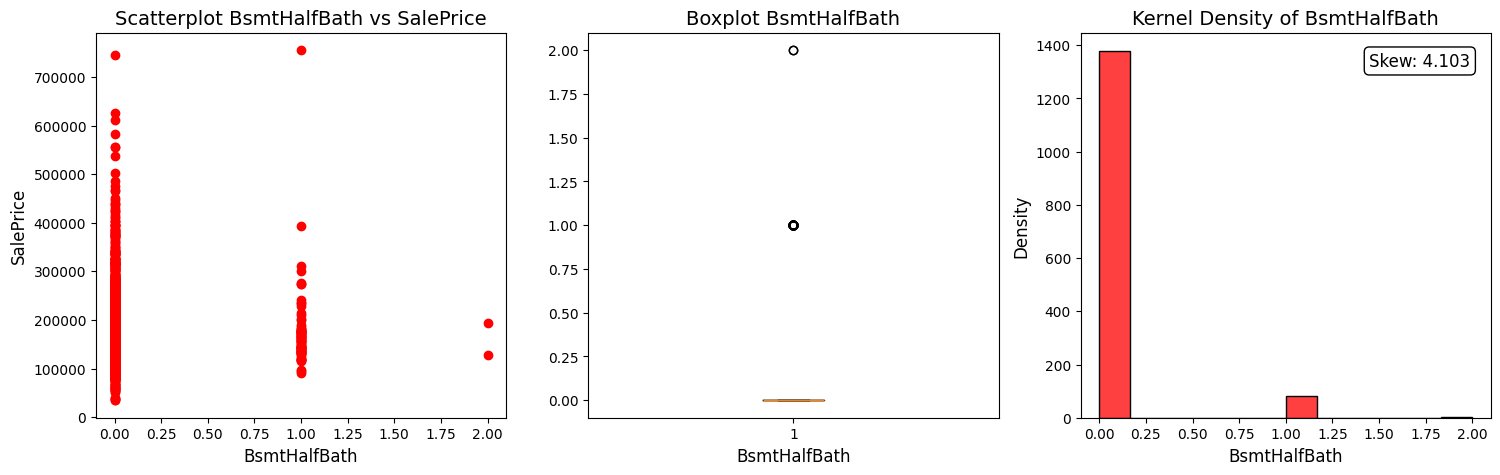

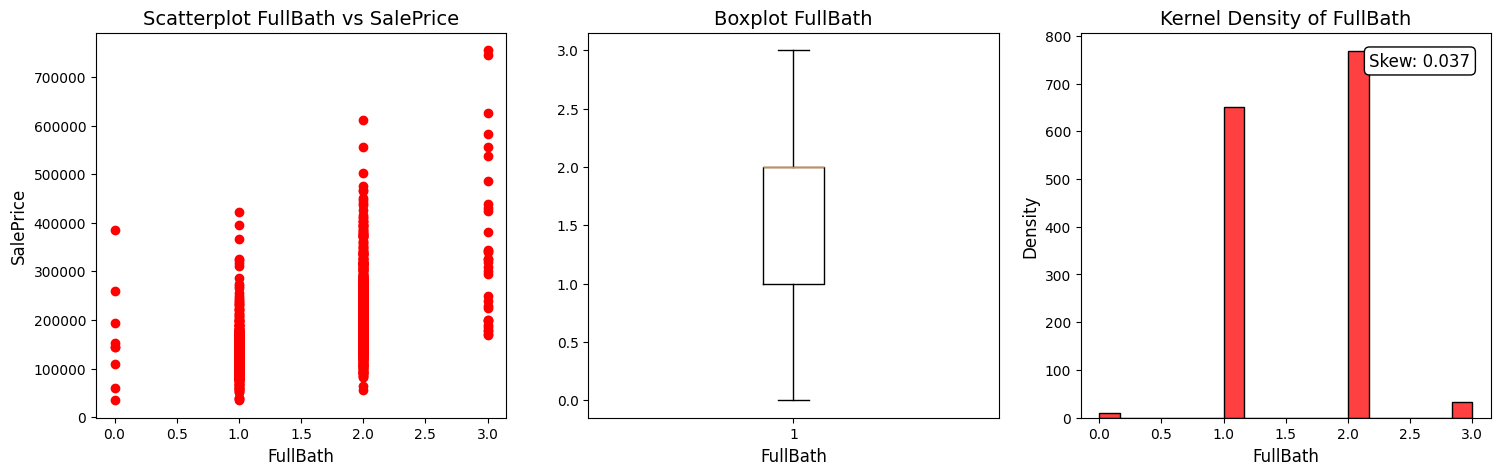

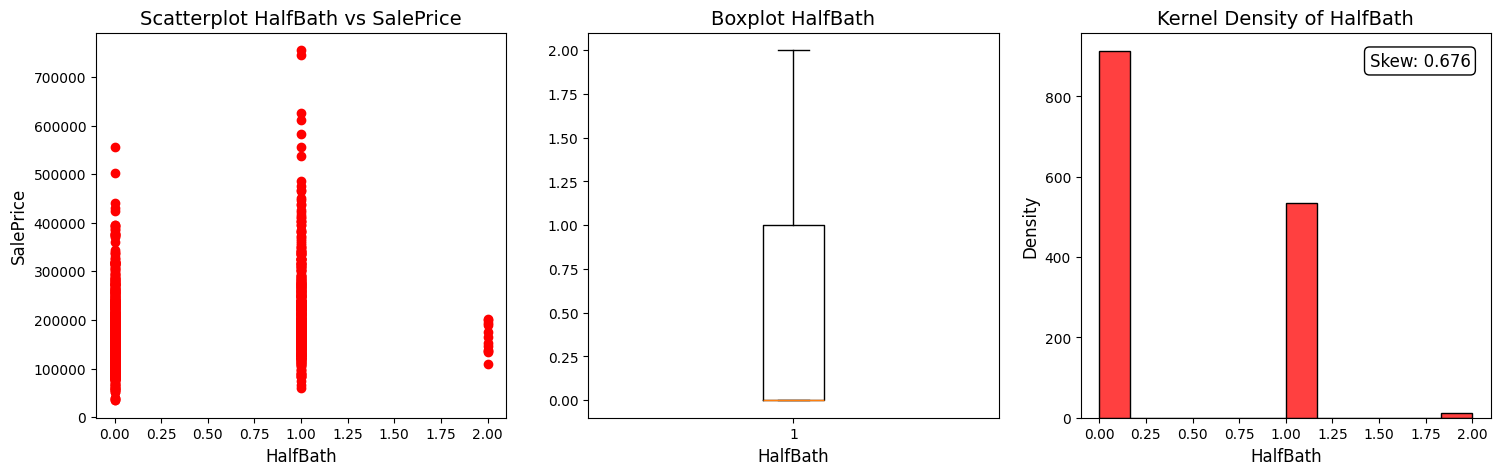

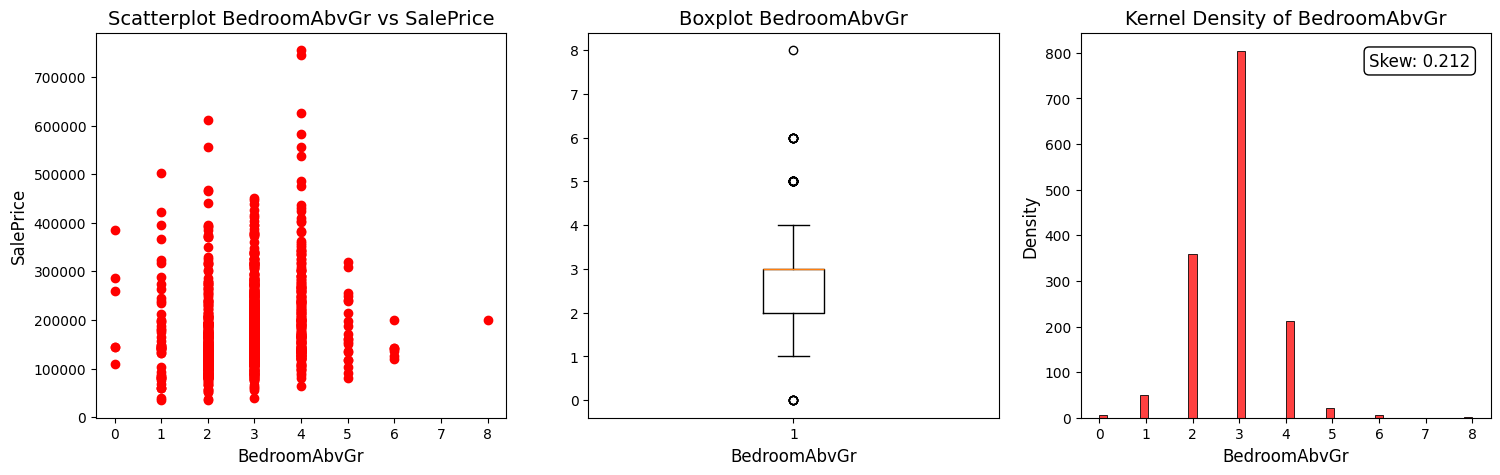

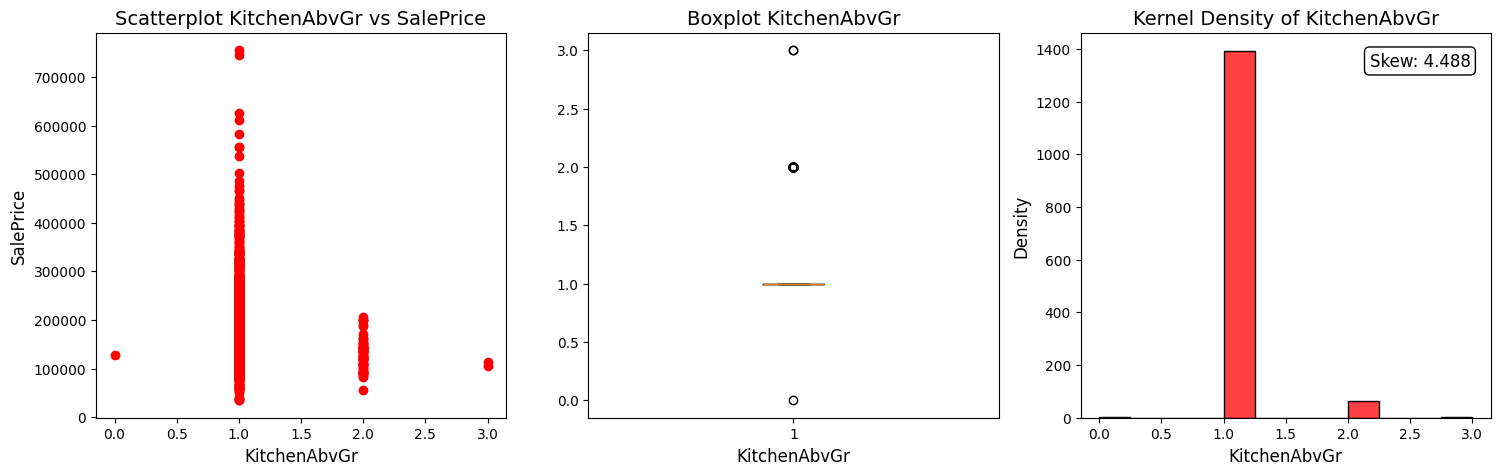

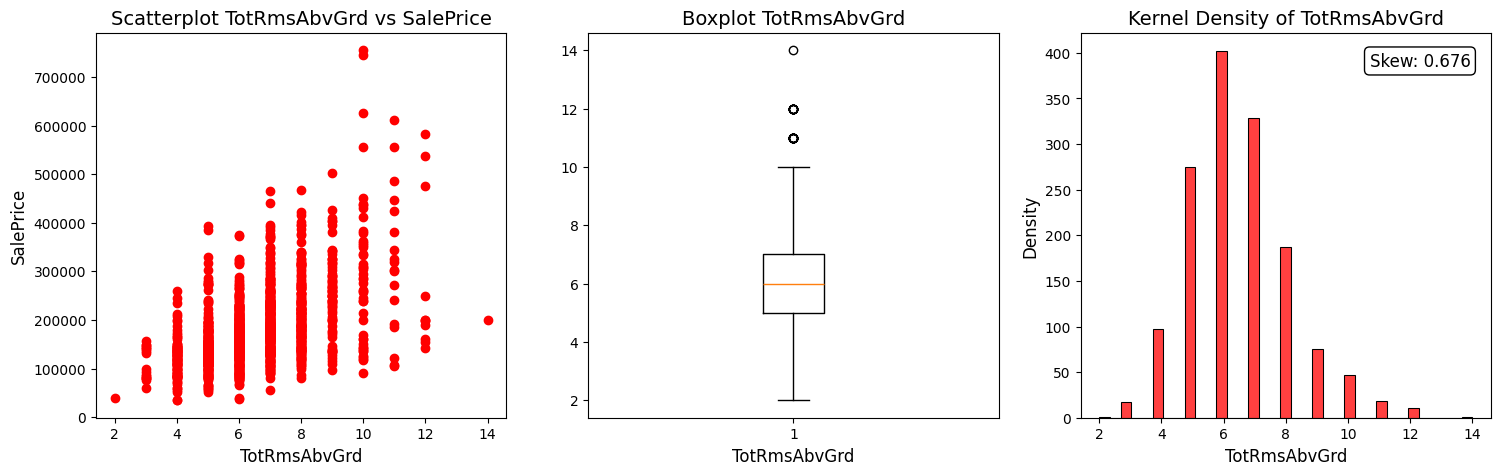

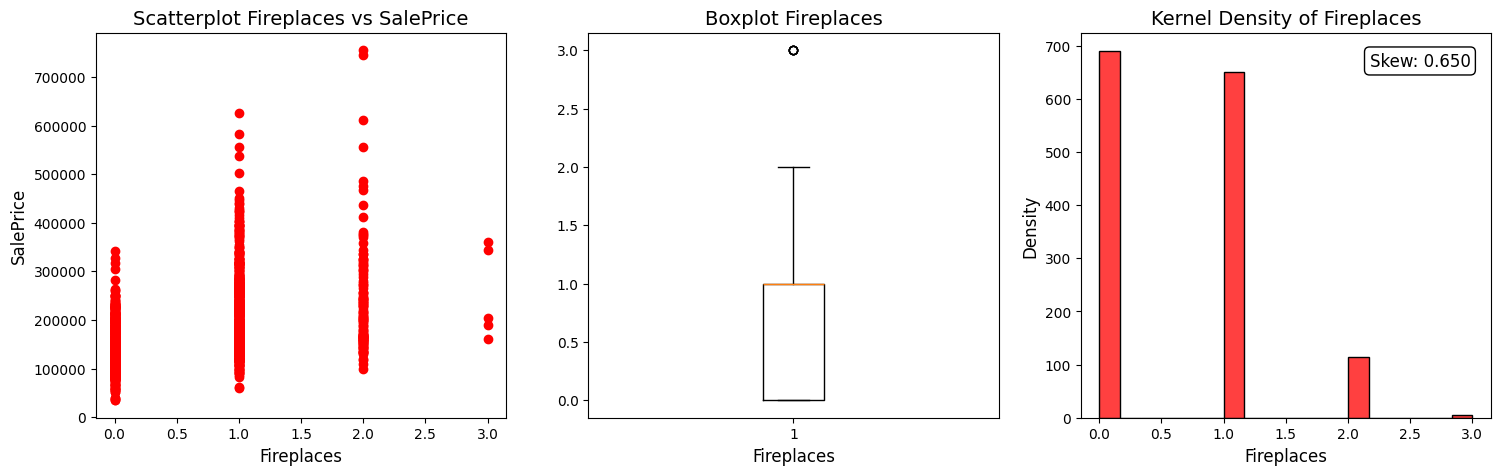

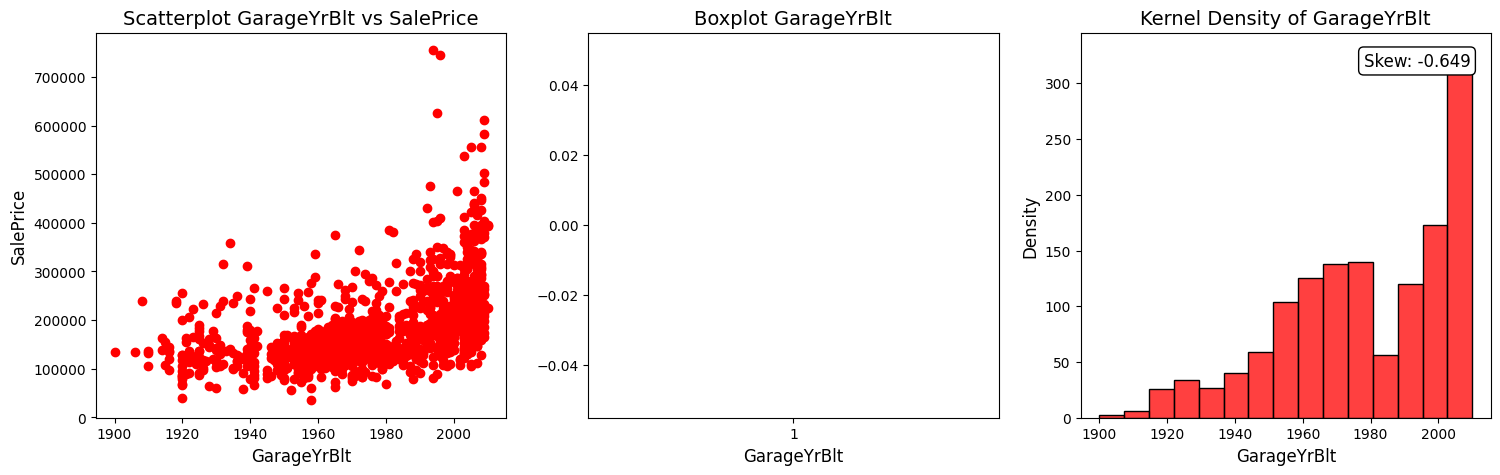

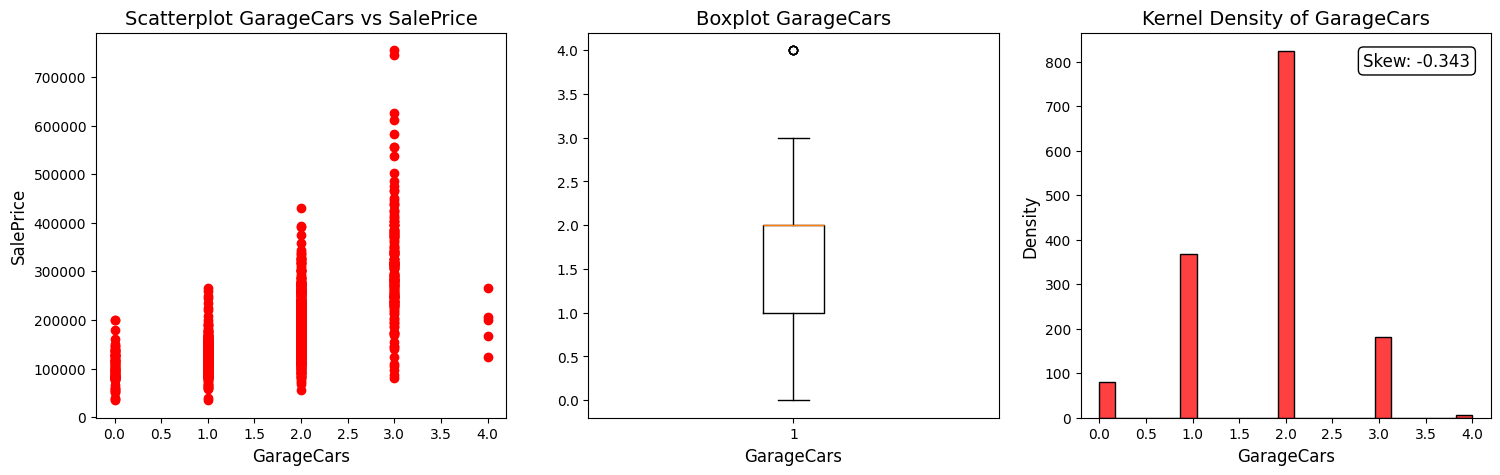

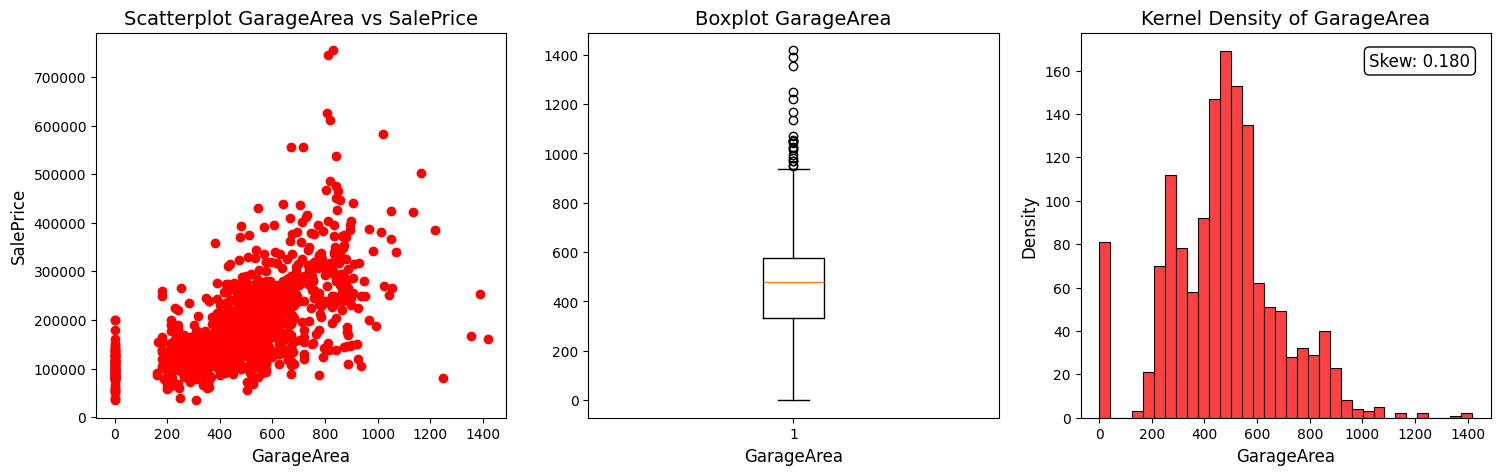

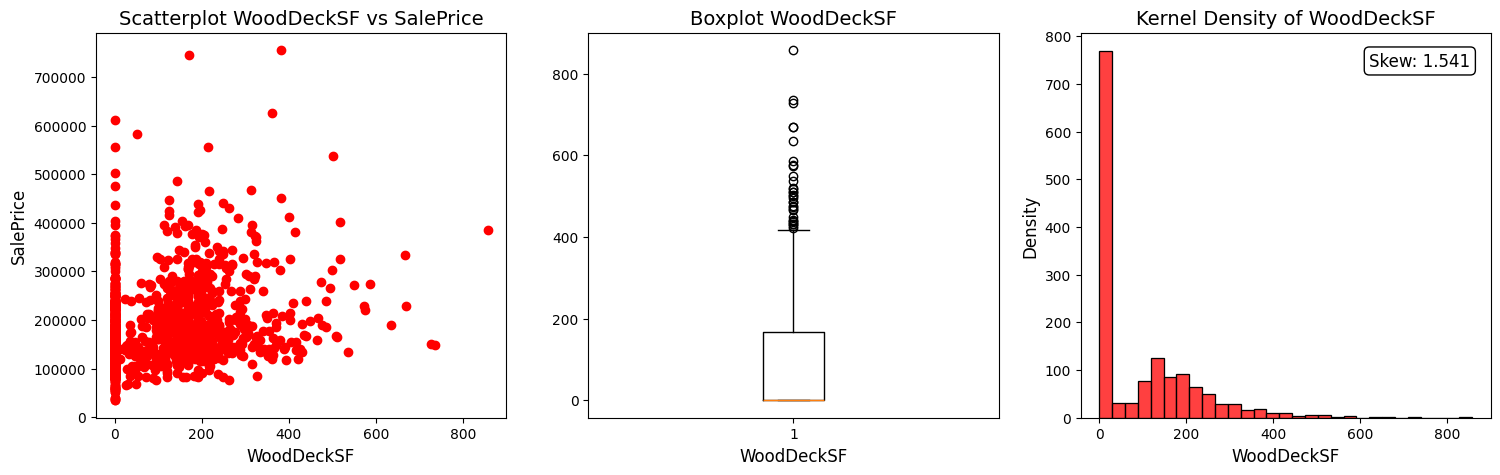

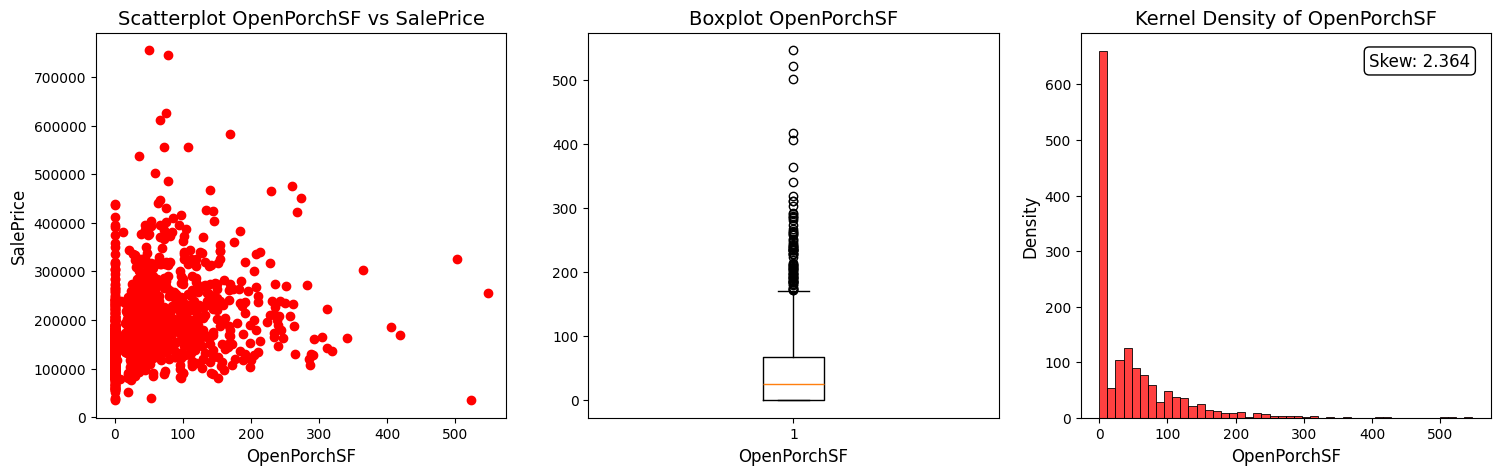

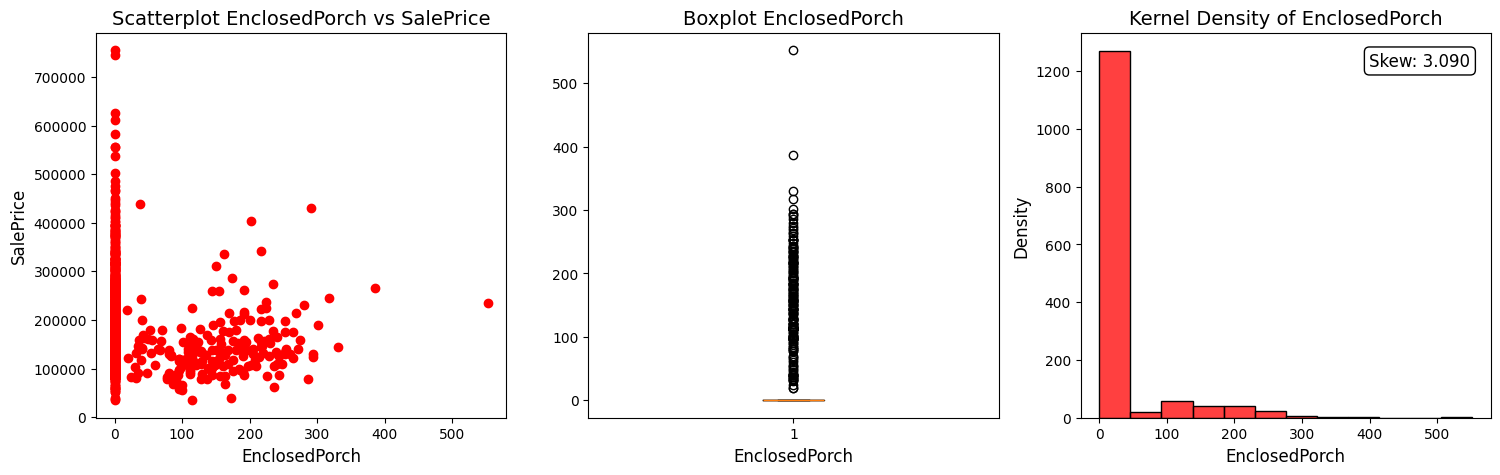

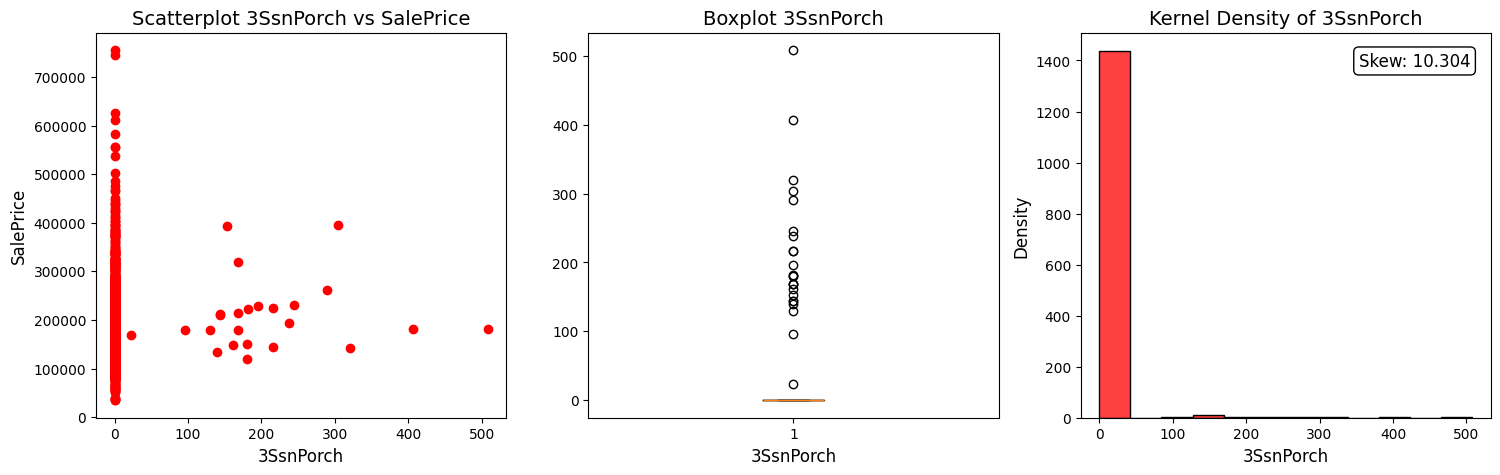

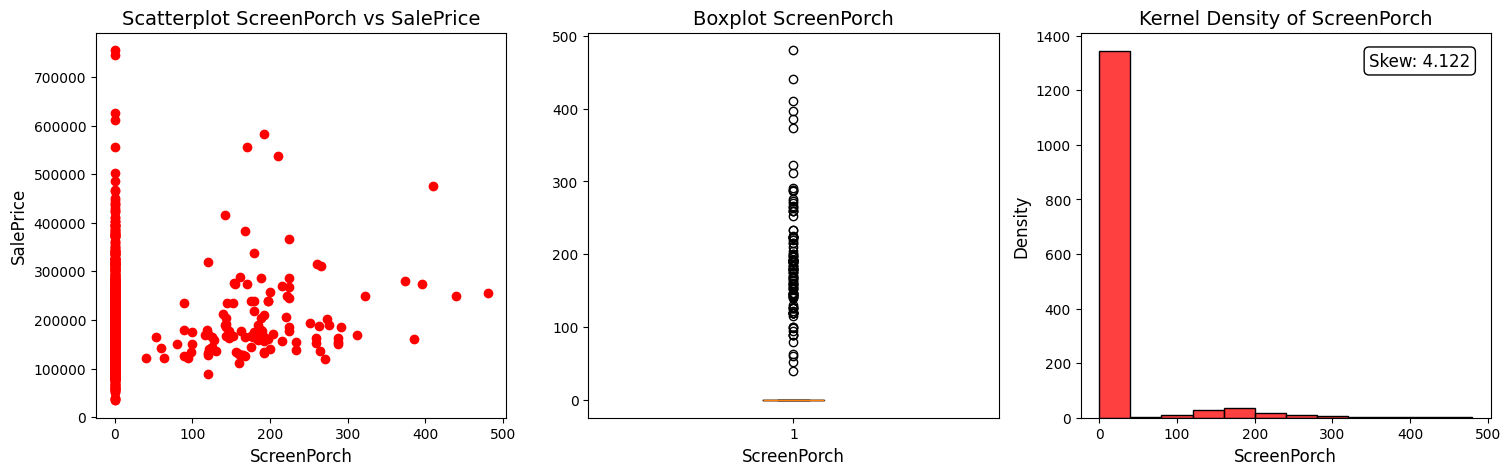

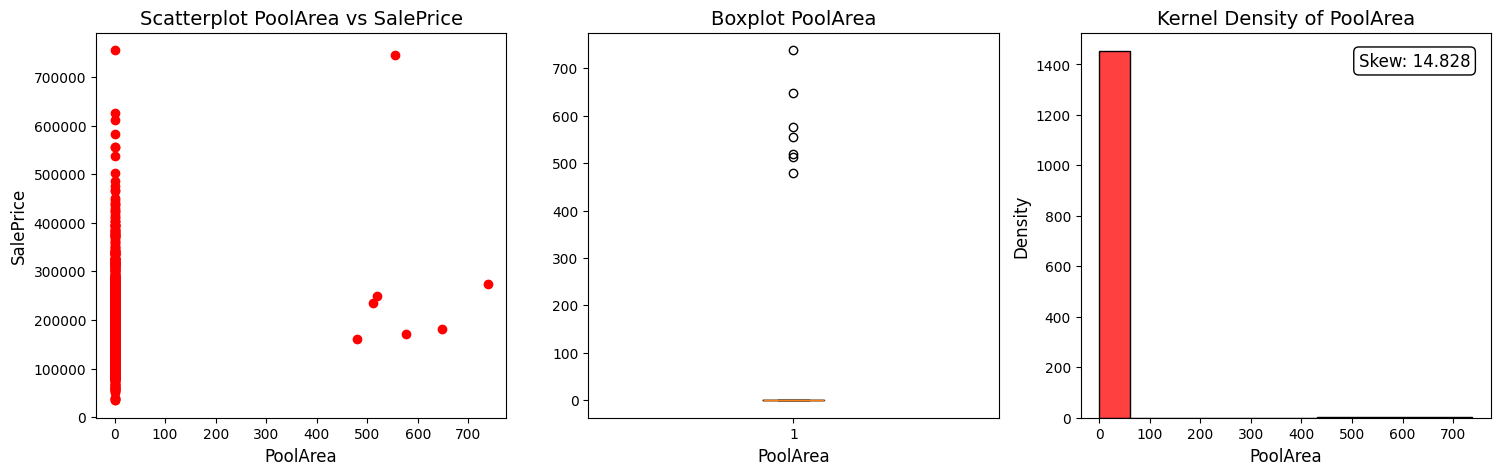

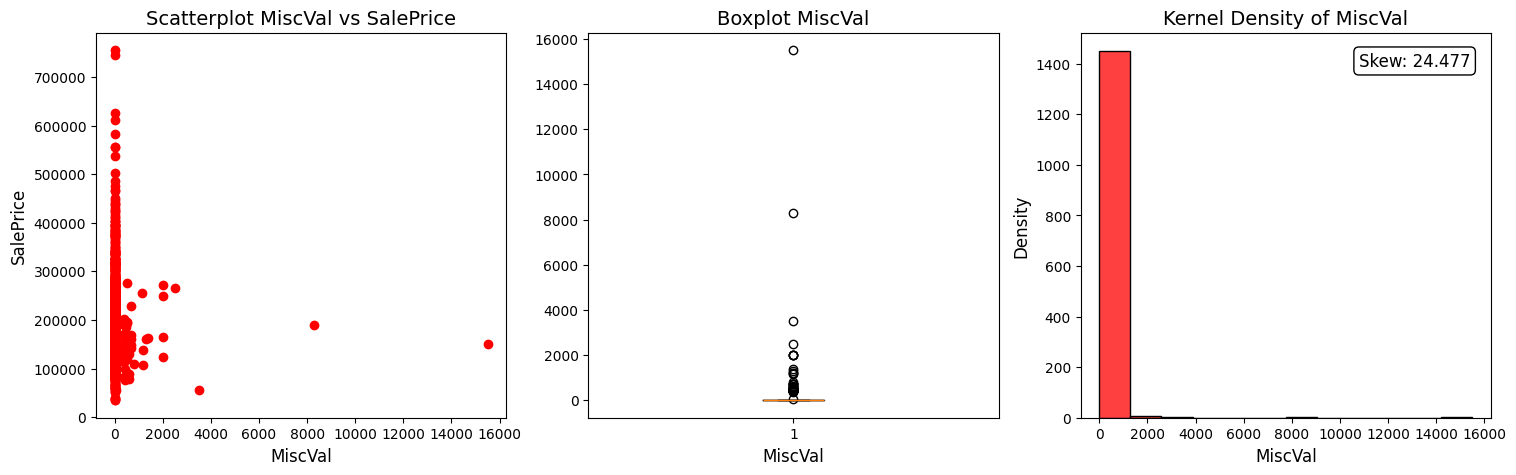

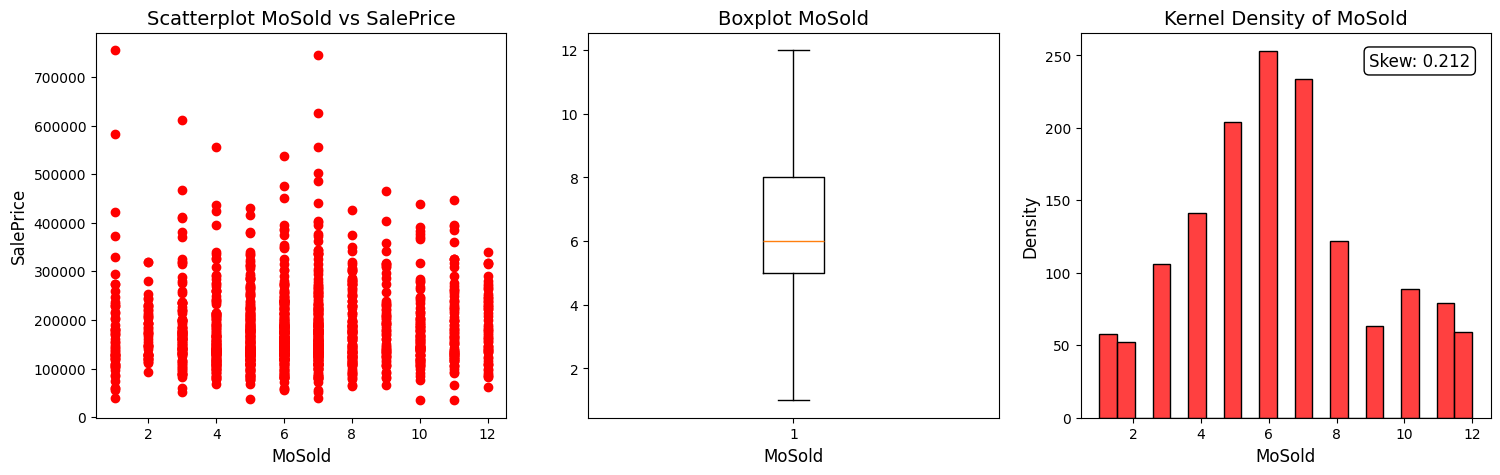

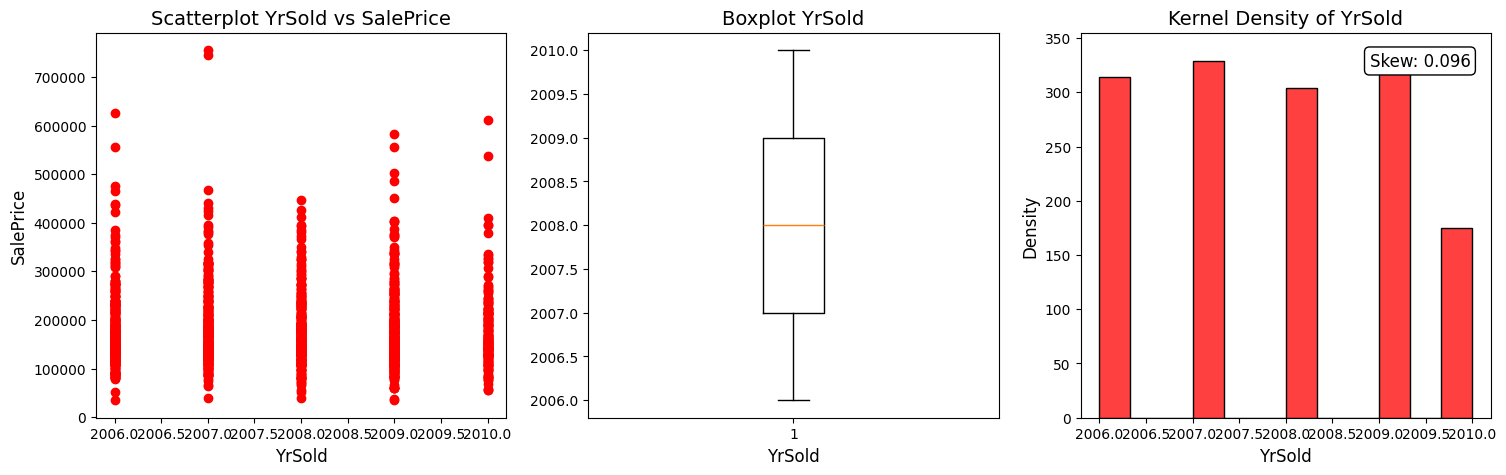

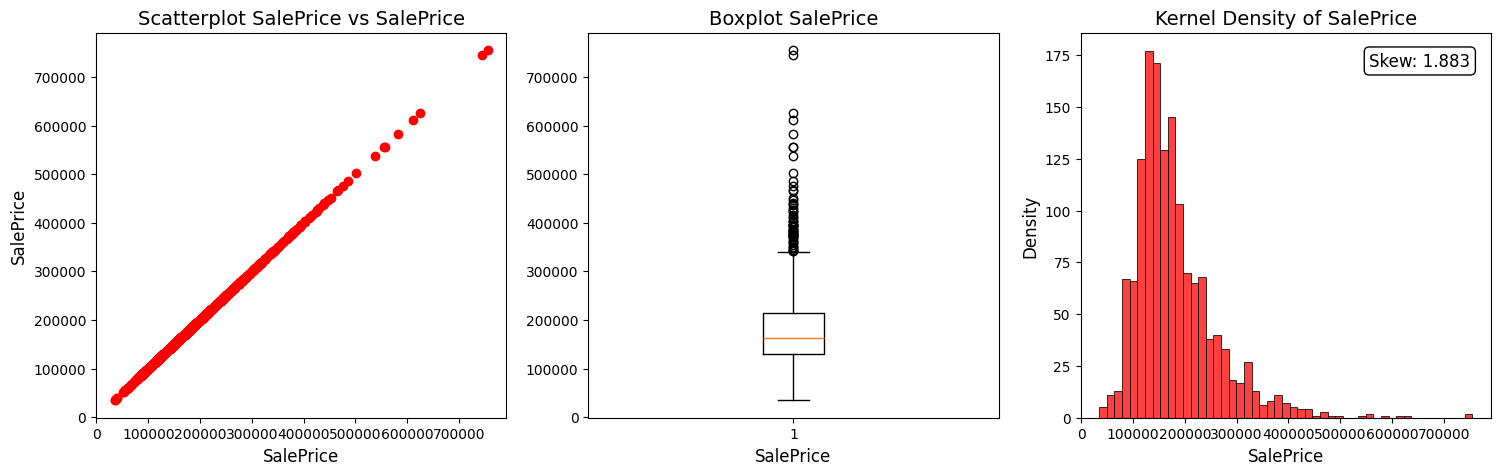

In [9]:
for col in df.select_dtypes(['float64', 'int64']):
    distributions(df, col)

1. There are many features with X characteristic having a value of 0, which creates a right-skewed distribution.

2. There are several points with high leverage, which can distort the best regression fit.

3. There are outliers in our target variable and our target value is right skewed, meaning we should apply a logarithimc transformation.

4. We are working with two types of variables: discrete and continuous. It is important to identify them to determine the most suitable imputation technique for the null values.

In [10]:
for col in df.select_dtypes(['category', 'object']):
    result = show_categories(df, col)
    print(result)
    print(f'{"="*100}')

  Categoría  Porcentaje (%)
0        RL          78.836
1        RM          14.932
2        FV           4.452
3        RH           1.096
4   C (all)           0.685
  Categoría  Porcentaje (%)
0      Pave          99.589
1      Grvl           0.411
  Categoría  Porcentaje (%)
0        NA          93.767
1      Grvl           3.425
2      Pave           2.808
  Categoría  Porcentaje (%)
0       Reg          63.356
1       IR1          33.151
2       IR2           2.808
3       IR3           0.685
  Categoría  Porcentaje (%)
0       Lvl          89.795
1       Bnk           4.315
2       HLS           3.425
3       Low           2.466
  Categoría  Porcentaje (%)
0    AllPub          99.932
1    NoSeWa           0.068
  Categoría  Porcentaje (%)
0    Inside          72.055
1    Corner          18.014
2   CulDSac           6.438
3       FR2           3.219
4       FR3           0.274
  Categoría  Porcentaje (%)
0       Gtl          94.658
1       Mod           4.452
2       Sev         

1. There are too many columns with null values.

2. There is significant imbalance in some categories.

3. In this subset, we are working with both nominal and ordinal variables.


# Outliers

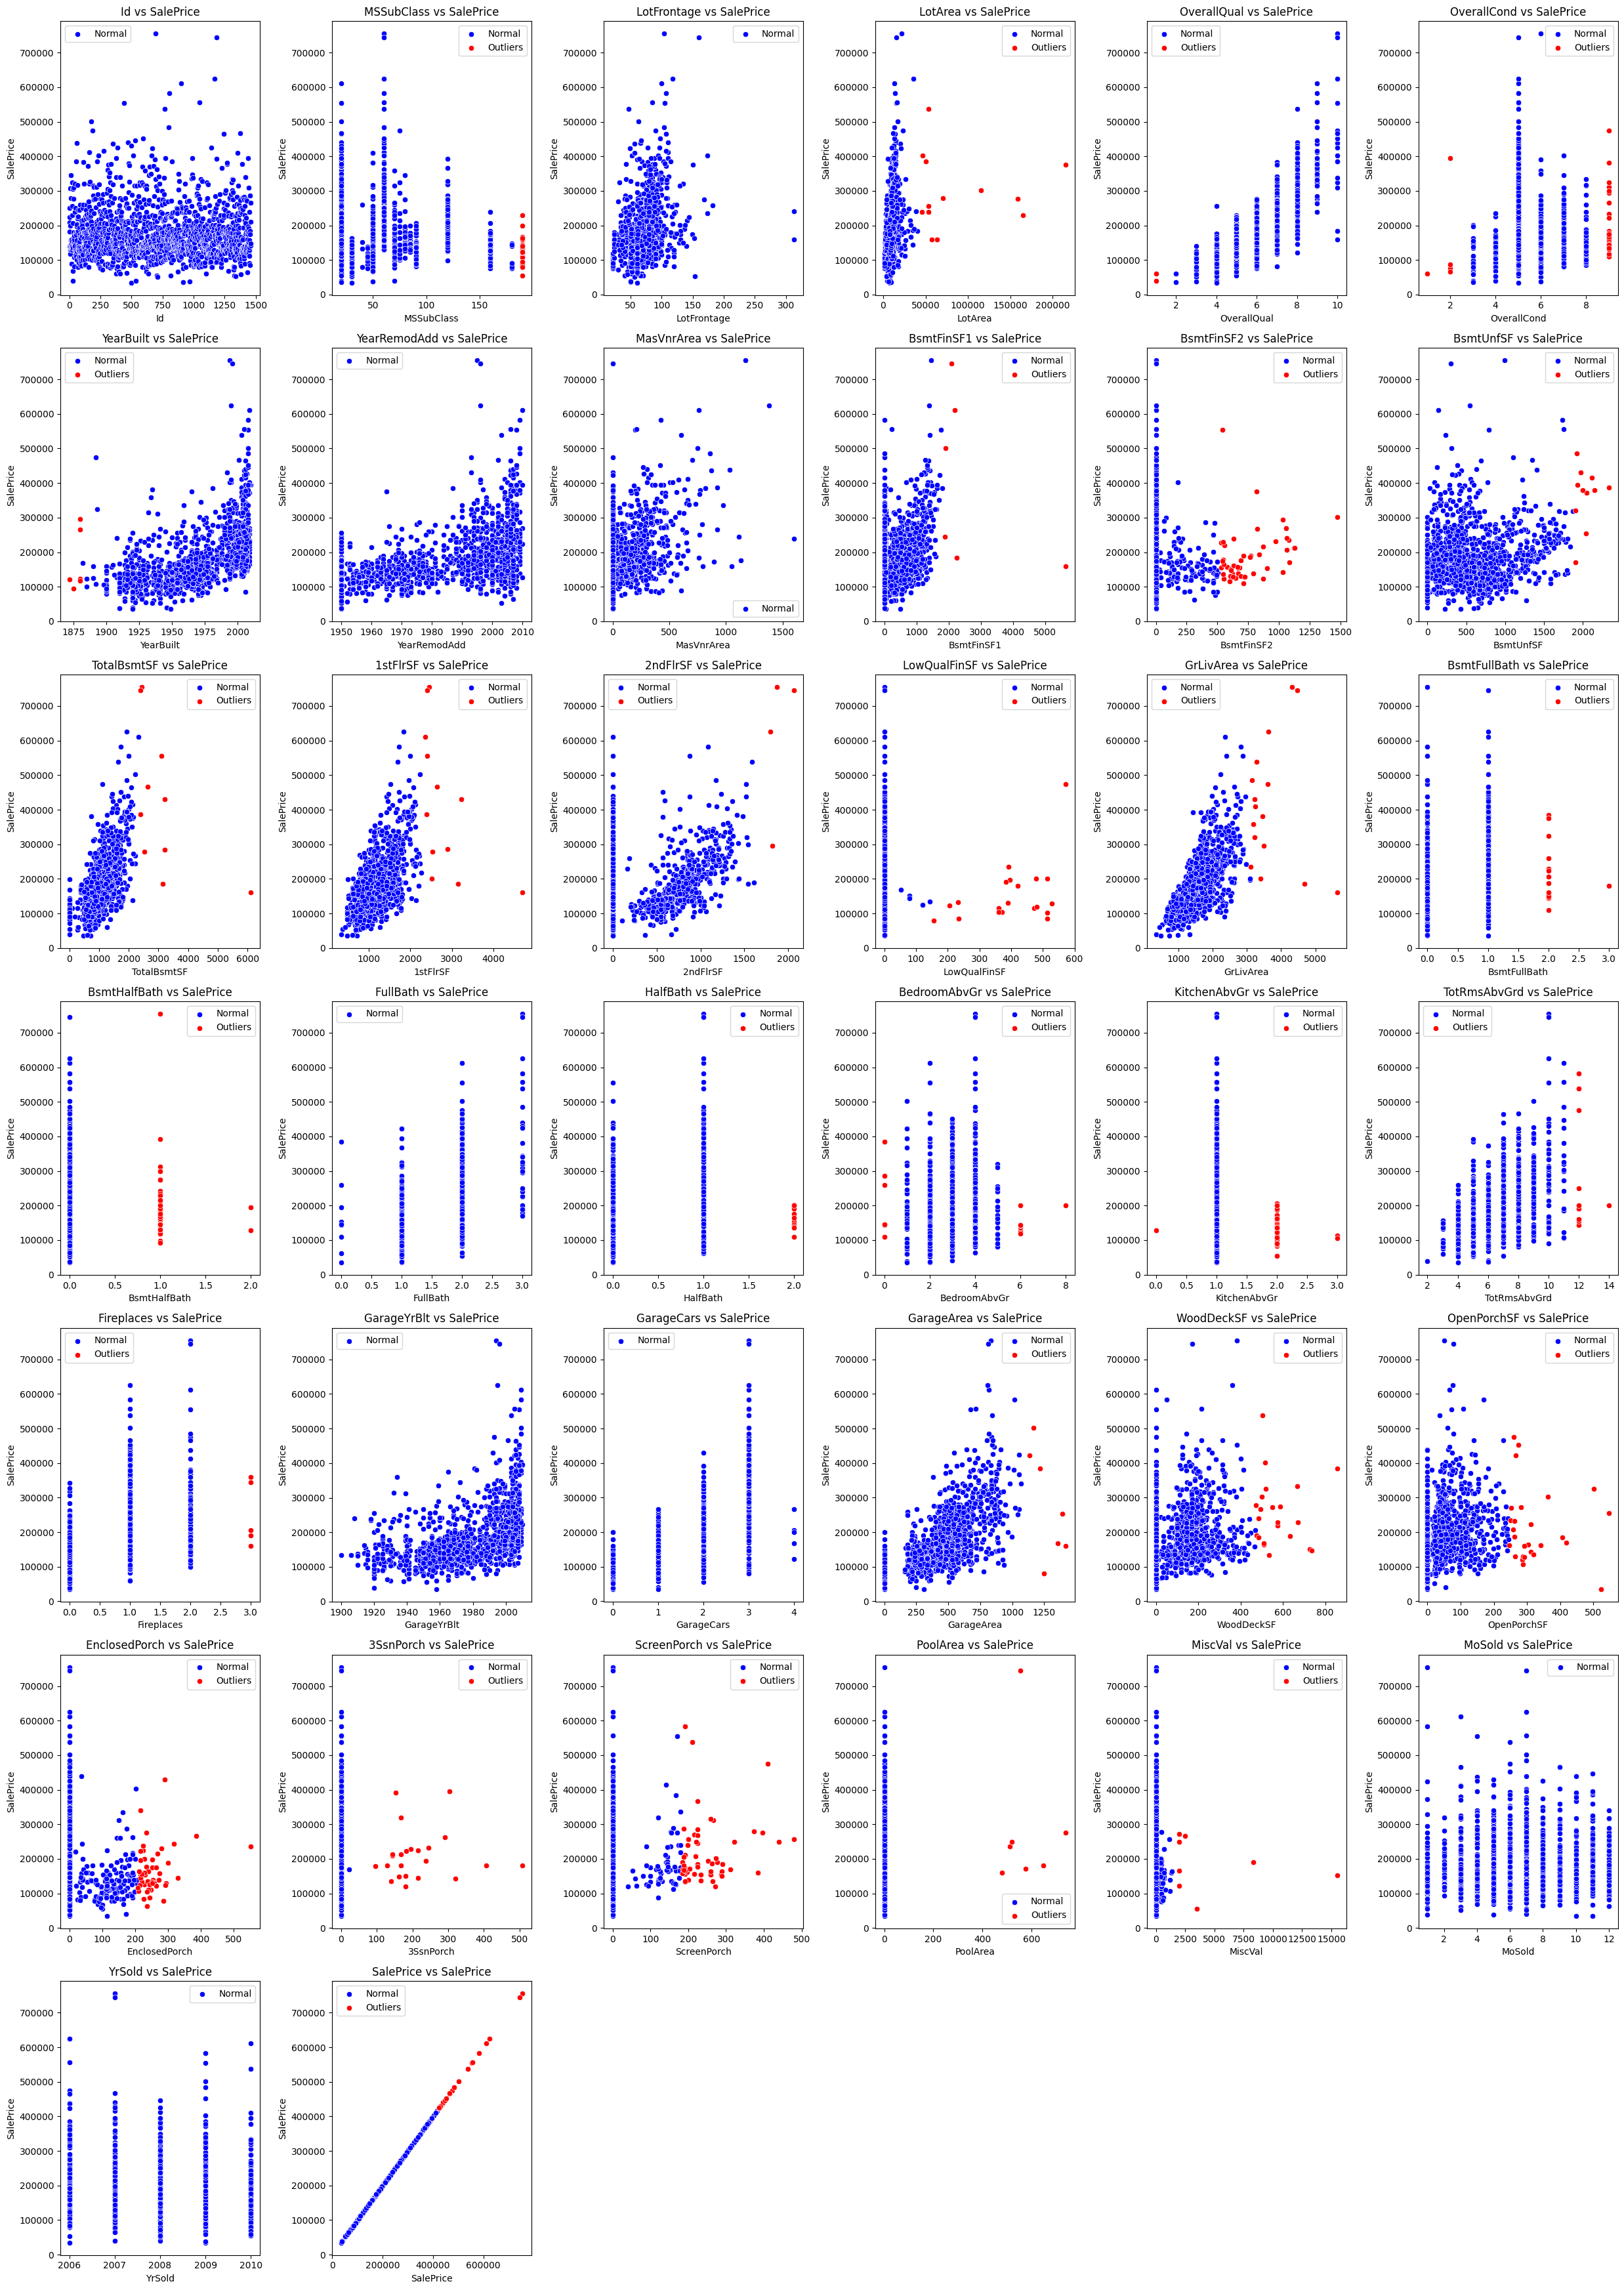

In [12]:
target = 'SalePrice'
num_vars = df.select_dtypes(['int', 'float']).columns
n_vars = len(num_vars)
n_cols = 6  
n_rows = int(np.ceil(n_vars / n_cols))  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(25, n_rows * 5))
axes = axes.ravel()  

for i, var in enumerate(num_vars):
    z_scores = stats.zscore(df[var])
    outliers = np.abs(z_scores) > 3
    normal_data = df.loc[~outliers, :]
    outliers_data = df.loc[outliers, :]

    sns.scatterplot(data=normal_data, x=var, y=target, ax=axes[i], color='blue', label='Normal')
    sns.scatterplot(data=outliers_data, x=var, y=target, ax=axes[i], color='red', label='Outliers')

    axes[i].set_title(f'{var} vs {target}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel(target)
    axes[i].legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Here, we want to focus on variables that have a strong relationship with our target value, specifically those with an absolute correlation of **|0.4| or higher**.  

For example:  
- **GarageArea** greater than **1,000 sqft** but a price lower than **$100K**?  
- **TotalBsmtSF** over **6,000 sqft** yet priced below **$200K**?  
- **1stFlrSF** exceeding **4,000 sqft** but still under **$200K**?  
- A house with **12 bedrooms** selling for less than **$230K**?  

Let's analyze these observations separately to better understand them.

In [13]:
mask = ((df['GrLivArea'] > 4000) & (df['SalePrice'] < 200000)) | \
       ((df['GarageArea'] > 1200) & (df['SalePrice'] < 300000)) | \
       ((df['TotalBsmtSF'] > 4000) & (df['SalePrice'] < 200000)) | \
       ((df['1stFlrSF'] > 4000) & (df['SalePrice'] < 200000)) | \
       ((df['TotRmsAbvGrd'] > 12) & (df['SalePrice'] < 230000))

insane_prices = df.loc[mask]

insane_prices.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.000,40094,Pave,NA,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.000,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.000,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
581,582,20,RL,98.000,12704,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,BrkFace,306.000,Ex,TA,PConc,Ex,TA,No,Unf,0,Unf,0,2042,2042,GasA,Ex,Y,SBrkr,2042,0,0,2042,0,0,2,1,3,1,Ex,8,Typ,1,Gd,Attchd,2009.000,RFn,3,1390,TA,TA,Y,0,90,0,0,0,0,NaN,NaN,NaN,0,8,2009,New,Partial,253293
635,636,190,RH,60.000,10896,Pave,Pave,Reg,Bnk,AllPub,Inside,Gtl,SWISU,Feedr,Norm,2fmCon,2.5Fin,6,7,1914,1995,Hip,CompShg,VinylSd,VinylSd,NaN,0.000,Fa,TA,CBlock,TA,Fa,No,LwQ,256,Unf,0,1184,1440,GasA,Ex,Y,FuseA,1440,1440,515,3395,0,0,2,0,8,2,Fa,14,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,110,0,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000
1061,1062,30,C (all),120.000,18000,Grvl,NA,Reg,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,3,4,1935,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.000,Fa,TA,CBlock,TA,TA,No,Unf,0,Unf,0,894,894,GasA,TA,Y,SBrkr,894,0,0,894,0,0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1994.000,RFn,3,1248,TA,TA,Y,0,20,0,0,0,0,NaN,NaN,Shed,560,8,2008,ConLD,Normal,81000
1190,1191,190,RL,NaN,32463,Pave,NA,Reg,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,2fmCon,1Story,4,4,1961,1975,Gable,CompShg,MetalSd,MetalSd,Stone,149.000,TA,Gd,CBlock,TA,TA,Av,BLQ,1159,Unf,0,90,1249,GasA,Ex,Y,SBrkr,1622,0,0,1622,1,0,1,0,3,1,TA,7,Typ,1,TA,2Types,1975.000,Fin,4,1356,TA,TA,Y,439,0,0,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal,168000


It's really strange that these houses sold for such a low price. The first two were **partial sales**—newly constructed homes—so that might explain their lower prices. The third one was an **abnormal sale**, which could also justify the discrepancy.  

However, the last two seem especially odd to me. Just in case its better to drop so we dont get the model to learn innappropiate behaviours of our data.

# ANOVA TESTS

How can we determine if a categorical variable is a good indicator of sale price, especially when correlation isn’t applicable? The answer lies in an ANOVA test, which examines whether the average sale prices differ significantly across different categories.

This test assigns a probability (p-value) to the likelihood that the observed differences in means occurred by chance. We define statistical significance as p < 0.05 or a t-statistic > 2.70.

The higher the t-statistic, the more important the variable is in explaining price variations.


Using domain knowledge and logical reasoning, we implemented three new features to evaluate their importance in predicting sale price.

In [14]:
df['SaleType_SaleCondition'] = df['SaleType'] + '_' + df['SaleCondition']
df['SaleType_Neighbord'] = df['SaleType'] + '_' + df['Neighborhood']
df['SaleCondition_Neighbord'] = df['SaleCondition'] + '_' + df['Neighborhood']
anova_results = categorical_anova_tukey(df, 'SalePrice')
print(anova_results)



                   Variable  F-Statistic
16                ExterQual      443.335
25              KitchenQual      407.806
18                 BsmtQual      392.914
29             GarageFinish      250.962
17               Foundation      125.259
7              Neighborhood      100.329
24               CentralAir       98.305
28               GarageType       88.803
21             BsmtFinType1       78.709
20             BsmtExposure       70.888
37   SaleType_SaleCondition       56.433
35                 SaleType       55.972
36            SaleCondition       55.792
14              Exterior2nd       55.089
13              Exterior1st       52.710
38       SaleType_Neighbord       51.656
39  SaleCondition_Neighbord       48.143
0                  MSZoning       43.840
32               PavedDrive       42.024
3                  LotShape       40.133
15               MasVnrType       30.746
11               HouseStyle       30.337
27              FireplaceQu       24.399
12              

To our surprise, the best categorical predictor turned out to be ExterQual, followed by other quality-related variables that reflect the property's condition. Initially, I expected Neighborhood to be the most influential factor.

The features we created also proved to be highly relevant, but this raises an important question: Are they worth the added complexity?

# What about numerical features?

<Axes: >

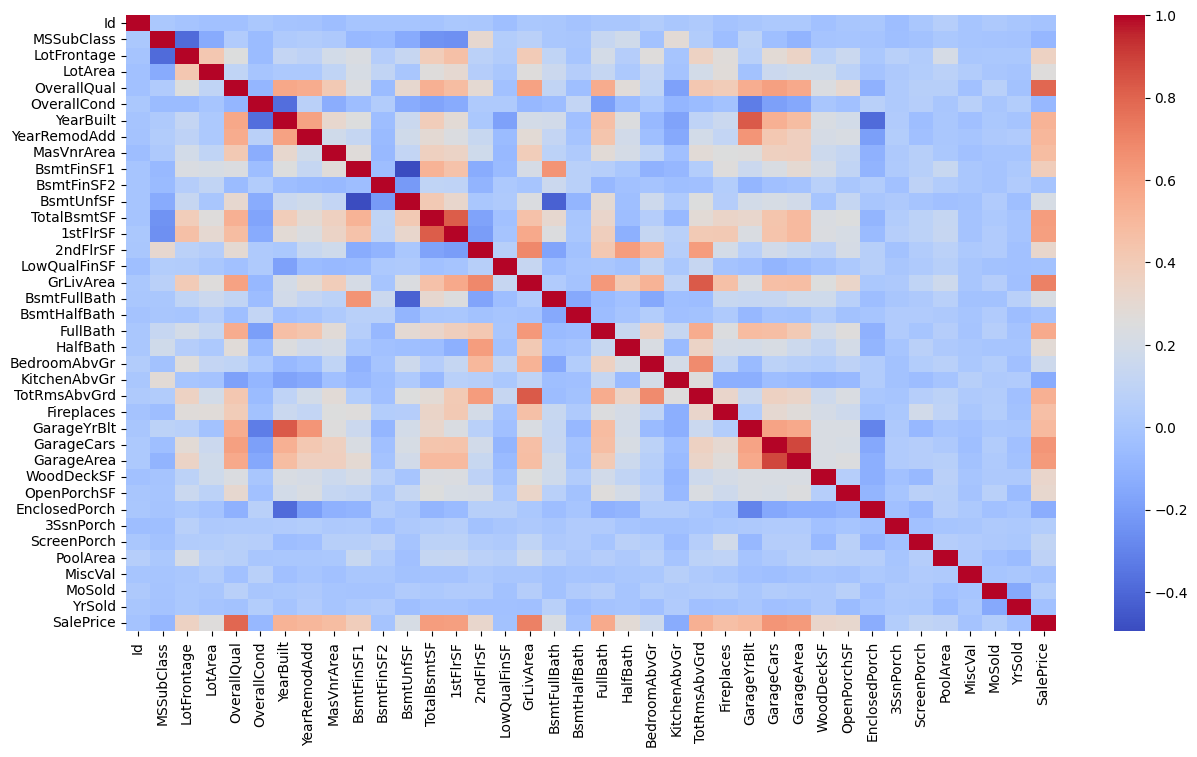

In [31]:
plt.figure(figsize = (15,8))
sns.heatmap(df.select_dtypes(['int64', 'float64']).corr(), cmap = 'coolwarm', cbar=True)

Good news, we can see theres some strong predictors of our SalePrice variable. But we also should take in consideration theres big multicolineality between some variables X (high orage/red squares between predictors) which violate some models assumptions.

# Conclusion

In this Exploratory Data Analysis (EDA), we uncovered several issues in our dataset that could introduce bias into our predictions. Specifically, we identified the presence of outliers and right skewness in both the dependent and independent variables. These issues can distort model performance, potentially leading to inaccurate results.

We also leveraged the ANOVA Test to pinpoint several significant categorical variables that exhibit a strong relationship with the target variable, SalePrice. This valuable insight helps us focus on the most influential features for prediction and guides how we should prepare these variables for modeling. Some of the selected variables were surprising, highlighting important factors that were initially overlooked.

Furthermore, we examined the distributions of our data and found that, overall, the dataset is largely close to normal. This is advantageous, as many statistical models assume normality. This observation suggests that linear models will likely perform well, given the distribution of the data.

With a clearer understanding of the data and the challenges ahead, we are now ready to move on to the next phase, preprocessing. In this phase, we will address issues such as null values, outliers, scaling, skewness, and feature engineering to enhance the dataset and improve the accuracy of our predictions.